Kayden Leftly



1. Introduction and Research Questions

The works of William Shakespeare have fascinated me since I discovered them. I've always been in awe of his literature's ability to survive centuries after his death, and more likely than not, centuries after mine. It seems as though he acheieved immortality - preserved in society through his life's work. And yet, though his texts were preserved perfectly, his identity remains a hotly-debated topic in academic circles. This prompted me to investigate the multi-faceted 'mystery' of Shakespeare and his work.

My first question: **What vocabulary differences exist between the three genres of Shakespeare's plays, namely, his tragedies, comedies and histories?** To do this, I would extract information on emotive language and use sentiment analysis to find the differences, if any, that existed between Shakespeare's genres.

Many a genuis has tried and failed to attribute Shakespeare's work, conclusively, to a series of Elizabethan academics and writers, including Francis Bacon, Christopher Marlowe, and Edward de Vere, Earl of Oxford. Naturally, I decided it was my turn to have a crack at putting this mystery to bed once and for all. I wanted to do some linguistic forensics, comparing Shakespeare's writing with prominent academics and writers of his time, those whom some believe to be the 'real' Shakespeare. My second question: **Which author/academic theorised to be Shakespeare writes most similarly to The Bard?** To do this, I would collect n-grams, use word-vector models, and compare unique tokens to find similarities between the authors and Shakespeare, using his plays, sonnets and poems.

2. The Data

One of the positives of using Shakespeare is that his work is readily available thanks to its existence under the public domain. I sourced his collected works from Project Gutenberg in one mammoth text file, which I used wget to attain. I devised an automatic system to filter through the titles and remove the bookends of legal and publishing information to sort the plays, poems and sonnets of Shakespeare into separate files. I stored the plays as separate files in a directory named 'shakespeare_corpus'. I created a list of all of Shakespeare's plays and took slices of the list so that each name was attributed to a genre. I then looped through the collected plays and created a file inside of shakespeare_corpus for each play, under the naming scheme: 'title(genre).txt'. Genres were three-letter (all-caps) codes; HIS, COM and TRA. This left me with thirty-eight files (for Shakespeare's thirty-eight plays) inside of the directory. I then used the CategorizedPlaintextCorpusReader, along with a suitable cat_pattern, to create a categorised corpus which was separated by the genre codes. Thus, I had a corpus of Shakespeare's plays separated by genre.

I quickly came to the realisation that the authors supposed to be Shakespeare's true identity were not all playwrights. Marlowe, in fact, was the only playwright of the three I chose to compare against The Bard. Francis Bacon had a very small number of poems and a trove of non-fictional prose, and de Vere was nothing if not a poet. This shifted my approach slightly as I realised that I would have to compare the relevant domains of Shakespeare with his supposed real identity: I would compare Marlowe's plays with Shakespeare's plays, Marlowe's poems with Shakespeare's poems, Bacon's essays with Shakespeare's poetry (as Shakespeare wrote no non-fiction prose that survives today) and de Vere's poetry with Shakespeare's poetry. This would provide some clearer results, especially when looking at strings of POS tags to see phrase construction, where there are tangible differences between plays and poetry in how phrases are built. Crucially, I would also do a benchmark comparison of Shakespeare against his own work (plays against plays) to compare my other results to. It would be unwise to simply assume that Shakespeare writes 100% like Shakespeare and uses all of the same phrases and word structures through all of his plays - there is certainly deviation.

Sourcing texts from the other authors was more variable. For example, I sourced Marlowe's poems and plays from Gutenberg, but the plays were all separate files which required manual trimming of the publishing and legal information which Gutenberg applies to all its texts. This was heavily time-consuming. Bacon's essays were available on Gutenberg, and his collection poems was so small (around eight hundred words in total) that any analysis would draw extremely limitied conclusions. Edward de Vere's poems were also found [here](https://shakespeareoxfordfellowship.org/poems-of-edward-de-vere/) at the same site - The Shakespeare Oxford Fellowship - a website which, it should be known, exists purely to explore the possibility of Shakespeare's true identity being de Vere. These two sets of poems needed to be copied from the website and written manually to a text document on my computer, then uploaded to my drive. All files were given suitable names, preprocessed, and pushed down the pipeline for analysis.

The sheer size of Shakespeare's body of work means that it is a perfect dataset to perform sentiment analysis on. The other authors produced much less in comparison and so in the second part I made sure to decrease the sample size of Shakespeare used for the comparison for a more levelled result.

3. The Program

My program is separated into two parts: 1 and 2. These cover my two questions and use different resources and methods to answer them.

In part one, I created a categorised corpus of Shakespeare's plays using the three genres as specified by the [Royal Shakespeare Company ](https://www.rsc.org.uk/shakespeares-plays/tragedies-comedies-histories). I then preprocessed the text, lowercasing all words, removing non-alpha characters and tokenising the text using nltk.work_tokenize. I use three word resources from external libraries: VADER, the [emotional words resource](https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/emotion_lexicon.txt) and the [humour words resource](https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/humor.txt). A dictionary is created for these two word lists to compare individual words to in my analysis.

run_q1_pt1 does a comparison using all the texts in each genre. It loops through the categorised corpus and for each fileid (each play), calculates an average VADER compound score. It also tallies up the counts of each emotion found and returns a percentage by the total number of emotional words found. It does the same for humour words, adding both to counters. When all the fileids are looped through for a genre, it averages these percentages by the number of fileids in the category, finding a category average of humour, VADER, and emotion scores. It generates pie charts of the emotional make-up of the categories, bar charts comparing VADER and humour scores, and writes the results to files.

run_q1_pt2 works identically to pt1 but crucially only runs the comparison on three plays (Henry VIII, The Tempest, Romeo and Juliet) - one from each genre, and analyses individual characters and their emotions and sentiment. This allows for a more specific picture of the different emotional roles characters play in their performances. It similarly displays pie charts and writes information to a new, timestamped file.

The second part of the program is larger as it requires more methods and processing to run the comparisons. I first consolidate all of the texts in one cell, then trim and process them in a second cell, and finally convert them to the correct format in a third cell. I define a series of methods to calculate metrics: common words, shared tokens, bigrams, trigrams and quadgrams. Finally, run_q2 generates a file for each comparison and fills it with information using all of the pre-created methods, as well as printing out information to the console, and graphing Word2Vec data and shared type data obtained from the analysis to visualise some of the comparisons.

4. Code

This code below imports all the necessary modules required for my analysis. It takes around fifteen minutes to run due to my importing of a word2vec model (one I selected from gensim's list of models; the google-news-300).

In [1]:
import re
import random
import nltk
from nltk.collocations import *
nltk.download(['stopwords', 'averaged_perceptron_tagger', 'punkt'])
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from nltk.text import Text
nltk.download('cmudict')
from nltk.corpus import cmudict
import pandas as pd
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.downloader
from gensim.models import Word2Vec
google_w2v = glove_vectors = gensim.downloader.load('word2vec-google-news-300')
from datetime import datetime
import pytz
tz_NZ = pytz.timezone('NZ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


[==================================================] 100.0% 1662.8/1662.8MB downloaded


The Program

Once the above cell has run, you can simply run from the cell below onwards to avoid the 20-minute wait.

In [32]:
# Create folder for reports to be written into
!mkdir 'reports'
# -- clears folder: !rm -rf 'reports'

In [33]:
# Import the vader sentiment analyzer and save to the variable `sid`
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# lexical resources helper

# make a helper function to create dictionaries.

# to grab the resource by url, we'll import requests
# could also use !wget or other URL libraries
import requests

# create a function to read in resource and output a dictionary.
def get_word_rating_resource(url):
  """helper function to get lexical resources for LING226 students
  resources are hosted on github as .txt in the form of Word\tValue\n
  """
  # read the raw text and split on newlines
  raw = requests.get(url).text.split('\n')

  # split each pair and convert value to rounded float
  # the if statement is there to avoid indexing errors when a row in a resource doesn't have complete data
  raw_list = [(pair.split('\t')[0], round(float(pair.split('\t')[1]), 3)) for pair in raw if len(pair.split('\t')) == 2]

  # create a dictionary and return it
  return dict(raw_list)

List of plays

Here, I create a list of all of the names of the plays so that I can process the collected works of shakespeare. Notice that they're all in one file but separated out into their genres by slices.

In [35]:
#Shakespeare's 38 plays:

play_titles = [
    #histories
    'THE FIRST PART OF KING HENRY THE FOURTH',
    'THE SECOND PART OF KING HENRY THE FOURTH',
    'THE LIFE OF KING HENRY THE FIFTH',
    'THE FIRST PART OF HENRY THE SIXTH',
    'THE SECOND PART OF KING HENRY THE SIXTH',
    'THE THIRD PART OF KING HENRY THE SIXTH',
    'KING HENRY THE EIGHTH',
    'THE LIFE AND DEATH OF KING JOHN',
    'KING RICHARD THE SECOND',
    'KING RICHARD THE THIRD',

    #tragedies
    'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK',
    'THE TRAGEDY OF JULIUS CAESAR',
    'THE TRAGEDY OF KING LEAR',
    'THE TRAGEDY OF ANTONY AND CLEOPATRA',
    'THE TRAGEDY OF ROMEO AND JULIET',
    'THE TRAGEDY OF OTHELLO, THE MOOR OF VENICE',
    'THE TRAGEDY OF MACBETH',
    'THE TRAGEDY OF TITUS ANDRONICUS',
    'THE TRAGEDY OF CORIOLANUS',
    'THE LIFE OF TIMON OF ATHENS',
    'TROILUS AND CRESSIDA',

    #comedies
    'ALL’S WELL THAT ENDS WELL',
    'AS YOU LIKE IT',
    'THE COMEDY OF ERRORS',
    'CYMBELINE',
    'LOVE’S LABOUR’S LOST',
    'MEASURE FOR MEASURE',
    'THE MERCHANT OF VENICE',
    'THE MERRY WIVES OF WINDSOR',
    'A MIDSUMMER NIGHT’S DREAM',
    'MUCH ADO ABOUT NOTHING',
    'PERICLES, PRINCE OF TYRE',
    'THE TAMING OF THE SHREW',
    'THE TEMPEST',
    'TWELFTH NIGHT; OR, WHAT YOU WILL',
    'THE TWO GENTLEMEN OF VERONA',
    'THE TWO NOBLE KINSMEN',
    'THE WINTER’S TALE',
]

histories = play_titles[:10]
tragedies = play_titles[10:21]
comedies = play_titles[21:]


''' POEMS AND SONNETS

    SONNETS
    A LOVER’S COMPLAINT
    THE PASSIONATE PILGRIM
    THE PHOENIX AND THE TURTLE
    THE RAPE OF LUCRECE
    VENUS AND ADONIS

'''


' POEMS AND SONNETS \n\n    SONNETS\n    A LOVER’S COMPLAINT\n    THE PASSIONATE PILGRIM\n    THE PHOENIX AND THE TURTLE\n    THE RAPE OF LUCRECE\n    VENUS AND ADONIS\n\n'

Getting Shakespeare's works

It's all in one file from Project Gutenberg.

In [36]:
# get the collected works of Shakespeare
# make a corpus folder to save each play to

!mkdir 'shakespeare_corpus'

!wget 'https://www.gutenberg.org/cache/epub/100/pg100.txt'
shakespeare = open('pg100.txt').read()

--2024-01-09 08:46:21--  https://www.gutenberg.org/cache/epub/100/pg100.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5638564 (5.4M) [text/plain]
Saving to: ‘pg100.txt’

pg100.txt           100%[===================>]   5.38M  27.0MB/s    in 0.2s    

2024-01-09 08:46:22 (27.0 MB/s) - ‘pg100.txt’ saved [5638564/5638564]



In [37]:
# finds each play by its title as defined above, and creates a new file with
# the genre of the play in brackets, in a folder called shakespeare_corpus

text = []
shakespeare_splitlines = shakespeare.split('\n')
f = open('/content/' + 'THE SONNETS' + '.txt', 'w+')
for line in shakespeare_splitlines:
  if line in play_titles:
    if line in histories:
      code = 'HIS'
    elif line in tragedies:
      code = 'TRA'
    elif line in comedies:
      code = 'COM'
    f.write(' '.join(text))
    f.close()
    text = []
    f = open('/content/shakespeare_corpus/' + line + '(' + code + ')' '.txt', 'w+')
  elif line == 'A LOVER’S COMPLAINT':
    f.write(' '.join(text))
    f.close()
  text.append(line)


In [38]:
# creating a categorised corpus now that we have text files
# cat pattern looks for the three-letter-code in the brackets in each file

corpus_location = '/content/shakespeare_corpus'
shakey_corpus = CategorizedPlaintextCorpusReader(root = corpus_location, fileids = '.*', cat_pattern ='.*(...)..txt')

In [39]:
# Measure number one: emotion words

# get emotion resource and split on newlines
emotion_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/emotion_lexicon.txt'
raw_emotion = requests.get(emotion_url).text.split('\n')

# create a list, but this time of triples
emotion_list = [(triple.split('\t')[0], triple.split('\t')[1], round(float(triple.split('\t')[2]),2)) for triple in raw_emotion]

# create empty dictionary with defaultdict having another dictionary inside
from collections import defaultdict
emotion_dict = defaultdict(dict)

# add each entry to the new dictionary
for triple in emotion_list:
  word, category, value = triple
  emotion_dict[word][category] = value

In [40]:
# Measure number two: comedy words

# create humor dictionary
humor_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/humor.txt'
humor_dict = get_word_rating_resource(humor_url)

# 1-5 rating of how funny each word is on average

Minimal preprocessing was required for question one. I lowered the words and removed any non-alpha words, but I wanted to retain stopwords as these are used in VADER sentiment calculations.

In [41]:
# preprocesses text

def preprocess_q1(text):
  # returns tokenized, lowercase and alpha words
  return (word.lower() for word in nltk.word_tokenize(text) if word.isalpha())


In [42]:
# Measure 3: vader

# measures the compount sentiment of each sentence in the text and calculates the average.

def vader_avg(lines):
  total = 0
  lines_used = 0
  for line in lines:
    line_processed = ' '.join(preprocess_q1(' '.join(line)))
    sentiment = sid.polarity_scores(line_processed)
    if sentiment:
      lines_used += 1
      total += sentiment['compound']
  return (total / lines_used)



In [43]:
#Graphing method

# This draws all of the bar graphs in the program.

def draw_metrics(x,y, title, label_x, label_y):
  colours =  [
      "#ffcc00", "#ff6699", "#66ccff", "#ff9933", "#99cc00",
      "#ff66cc", "#66ff99", "#ccff33", "#ff3366", "#33ccff",
      "#ff6600", "#ccff66", "#66ffcc", "#ff3300", "#ff9966",
      "#99cc33", "#ff3399", "#ffcc66", "#66ff33", "#ccff99",
      "#ff0033", "#33cc66", "#66cc33", "#ff6600", "#cc66ff",
      "#3399ff", "#ff3300", "#ffcc33", "#cc33ff", "#33ffcc"
              ]
  colour = random.choice(colours)
  X = np.array(x)
  Y = np.array(y)
  plt.figure(figsize=(10, 5))
  plt.title(title)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.bar(X,Y, color = colour)
  plt.show()

Question one part one

Loops through the categories and then through each fileid in the category. Calculates the average sentiment, emotional counts, and humour for each text, then adds it to a larger dictionary to calculate the average across all texts in one genre.

In [44]:
# write text files
# then write the report!!!
def run_q1_pt1():
  datetime_NZ = datetime.now(tz_NZ)
  outfile = open('/content/reports/q1-genre-comparison' + str(datetime_NZ) + '.txt', 'w+')

  humour_y = []
  humour_labels = []

  vader_y = []
  vader_labels = []

  for category in shakey_corpus.categories():
    print(category)
    humour_labels.append(category)
    vader_labels.append(category)
    outfile.write('Category: ' + category + '\n\n')
    # track stats per category
    category_emotion_dict = {}
    humour_total = 0
    words_used_average = 0
    vader_avs = 0
    fileids = shakey_corpus.fileids(category)
    for fileid in fileids:
      # tracking stats per play
      emotion_counts = {}
      humour_average = 0
      total_word_count = 0
      emotional_word_count = 0
      humorous_word_count = 0

      # data used for analysis
      raw_text = shakey_corpus.raw(fileid)
      raw_sents = shakey_corpus.sents(fileid)
      # run vader method
      vader_text = vader_avg(raw_sents)
      vader_avs += vader_text
      clean_tokenized_text = preprocess_q1(raw_text)
      # calculate emotive word counts
      for word in clean_tokenized_text:
        total_word_count += 1
        if word in emotion_dict.keys():
          emotional_word_count += 1
          for entry in emotion_dict[word].keys():
            if entry not in emotion_counts.keys():
              emotion_counts[entry] = emotion_dict[word][entry]
            else:
              emotion_counts[entry] += emotion_dict[word][entry]
        # calculate humout word counts
        if word in humor_dict.keys():
          humorous_word_count += 1
          humour_average += humor_dict[word]
      humour_average /= humorous_word_count
      humour_total += humour_average
      words_used_average += emotional_word_count / total_word_count
      for emotion in emotion_counts.keys():
        if emotion not in category_emotion_dict.keys():
          category_emotion_dict[emotion] = emotion_counts[emotion] / emotional_word_count
        else:
          category_emotion_dict[emotion] += emotion_counts[emotion] / emotional_word_count
    #print and write results to file
    vader_avs /= len(fileids)
    print("VADER average compound polarity score: " + str(vader_avs))
    outfile.write("VADER average compound polarity score: ")
    outfile.write(str(vader_avs))
    outfile.write('\n\n')
    vader_y.append(vader_avs)
    y = []
    labels = []
    outfile.write('Emotion report: \n')
    for emotion in category_emotion_dict.keys():
      outfile.write(emotion + ': ')
      outfile.write(str(100 * (category_emotion_dict[emotion]/len(fileids))))
      outfile.write('% \n')
      print(emotion + ': ' + str(100 * (category_emotion_dict[emotion]/len(fileids))) + "%")
      labels.append(emotion)
      y.append(category_emotion_dict[emotion]/len(fileids))
    outfile.write('\n')
    print("Average Humour (1-5): " + str(humour_total/len(fileids)))
    outfile.write("Average Humour (1-5): ")
    outfile.write(str(humour_total/len(fileids)))
    outfile.write('\n\n')
    humour_y.append(humour_total/len(fileids))
    print("Average percentage of words used for calculation: " + str(100 * (words_used_average/len(fileids))) + "%")
    outfile.write("Average percentage of words used for calculation: ")
    outfile.write(str(100 * (words_used_average/len(fileids))))
    outfile.write('% \n\n')
    Y = np.array(y)
    plt.title(category)
    plt.pie(Y, labels=labels)
    plt.show()

  print('Graphs')

  # draw graphs

  draw_metrics(humour_labels, humour_y, 'Humour average scores (1-5)', "Genre", "Score")
  draw_metrics(vader_labels, vader_y, 'Vader average scores', "Genre", "Score")

  outfile.close()


Question one part two

runs similarly to part one.

In [60]:
def run_q1_pt2():

  datetime_NZ = datetime.now(tz_NZ)
  outfile = open('/content/reports/q1-character-comparison' + str(datetime_NZ) + '.txt', 'w+')

  big_dict = {}
  for category in shakey_corpus.categories():
    #print(category)
    fileids = shakey_corpus.fileids(category)
    for fileid in fileids:
      #print(fileid)
      character_dict = {}
      current_character = ""
      raw_text = shakey_corpus.raw(fileid)
      clean_tokenized_text = nltk.sent_tokenize(raw_text)
      for i in range (0, len(clean_tokenized_text)):
        if i != len(clean_tokenized_text):
          if clean_tokenized_text[i].isupper() and 'ACT' not in clean_tokenized_text[i] and 'SCENE' not in clean_tokenized_text[i] and 'PROLOGUE' not in clean_tokenized_text[i]:
            current_character = clean_tokenized_text[i]
            if clean_tokenized_text[i] not in character_dict.keys():
              character_dict[current_character] = []
          elif current_character != "":
            character_dict[current_character].append(clean_tokenized_text[i])
      #for character in character_dict.keys():
        #if len(character_dict[character]) != 0:
          #print(character + ": " + character_dict[character][0])
      big_dict[fileid] = character_dict

  # 3 categories - 3 plays - 3 characters
  # com - the tempest - prospero, miranda, ariel
  # tra - romeo and juliet - romeo, juliet, benvolio, mercutio
  # his - king henry viii - king, cardinal wolsey, queen katherine
  tempest_file = 'THE TEMPEST(COM).txt'
  tempest_list = [
    'PROSPERO.',
    'MIRANDA.',
    'ARIEL.'
  ]
  romeo_file = 'THE TRAGEDY OF ROMEO AND JULIET(TRA).txt'
  romeo_list = [
    'ROMEO.',
    'JULIET.',
    'BENVOLIO.',
    'MERCUTIO.'

  ]
  henry_file = 'KING HENRY THE EIGHTH(HIS).txt'
  henry_list = [
      'KING.',
      'WOLSEY.',
      'QUEEN KATHERINE.'
  ]

  loop_dict = {henry_file: henry_list, tempest_file: tempest_list, romeo_file: romeo_list }

  for play in loop_dict.keys():
    outfile.write('Play: ' + play + '\n\n')
    for character in loop_dict[play]:
      outfile.write('Character: ' + character + '\n')
      vader_lines = 0
      lines_used = 0
      lines = big_dict[play][character]
      print("Character: " + character)
      emotion_counts = {}
      total_word_count = 0
      emotional_word_count = 0
      for line in lines:
        current = sid.polarity_scores(line)
        if current:
          lines_used += 1
          vader_lines += current['compound']
        clean_tokenized_text = preprocess_q1(line)
        for word in clean_tokenized_text:
          total_word_count += 1
          if word in emotion_dict.keys():
            emotional_word_count += 1
            for entry in emotion_dict[word].keys():
              if entry not in emotion_counts.keys():
                emotion_counts[entry] = emotion_dict[word][entry]
              else:
                emotion_counts[entry] += emotion_dict[word][entry]
      avg_vader = vader_lines / lines_used
      print("VADER Score for " + character + ": " + str(avg_vader))
      outfile.write("VADER average compound polarity score for " + character + ': ')
      outfile.write(str(avg_vader))
      outfile.write('\n\n')
      words_used_average = emotional_word_count / total_word_count
      y = []
      labels = []
      outfile.write('Emotion report: \n')
      for emotion in emotion_counts.keys():
        outfile.write(emotion + ': ')
        outfile.write(str(100 * (emotion_counts[emotion]/emotional_word_count)))
        outfile.write('% \n')
        print(emotion + ': ' + str(100 * (emotion_counts[emotion]/emotional_word_count)) + "%")
        labels.append(emotion)
        y.append(emotion_counts[emotion])
      outfile.write('\n')
      print("Average percentage of emotional words used for calculation: " + str(100 * (words_used_average)) + "%")
      outfile.write("Average percentage of emotional words used for calculation: ")
      outfile.write(str(100 * words_used_average))
      outfile.write('% \n\n')
      Y = np.array(y)
      plt.title(character)
      plt.pie(Y, labels=labels)
      plt.show()

  outfile.close()



COM
VADER average compound polarity score: 0.05822056656636792
anger: 7.935951000377292%
anticipation: 12.345280090804328%
disgust: 6.978778115131651%
fear: 9.509507065219239%
joy: 13.824641816188374%
negative: 17.778812494248143%
positive: 31.992236294122005%
sadness: 8.667109583446956%
surprise: 7.410379754634182%
trust: 19.967724793730532%
Average Humour (1-5): 2.214122695092959
Average percentage of words used for calculation: 23.47398234916304%


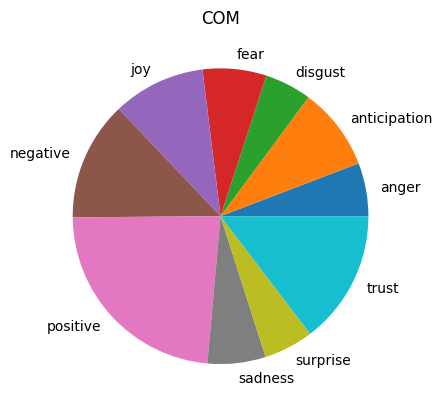

HIS
VADER average compound polarity score: 0.028185832596402977
anger: 9.410636106646853%
anticipation: 11.310735143069165%
disgust: 8.768300915815766%
fear: 11.973640600443499%
joy: 11.22501568517427%
negative: 20.979239649011554%
positive: 31.66809417120655%
sadness: 10.270964062088392%
surprise: 6.4672680953005335%
trust: 19.00851857914226%
Average Humour (1-5): 2.1836704085313
Average percentage of words used for calculation: 25.35222158159399%


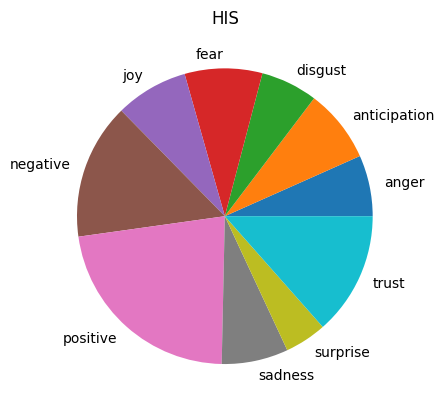

TRA
VADER average compound polarity score: 0.025057199011483587
anger: 9.250561542151653%
anticipation: 11.225400304832753%
disgust: 8.28776475984402%
fear: 11.513645227672914%
joy: 11.436789688086417%
negative: 20.586178504054402%
positive: 27.322978990286835%
sadness: 10.137922526760914%
surprise: 6.833033045939266%
trust: 18.37073401487709%
Average Humour (1-5): 2.18809283147263
Average percentage of words used for calculation: 22.97033600449983%


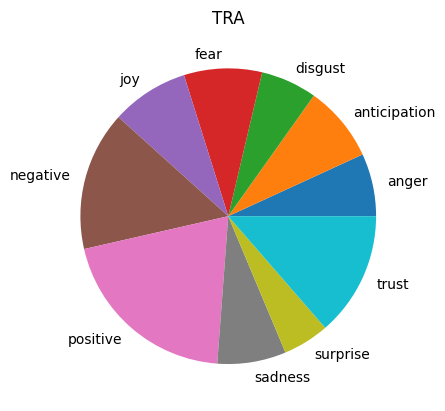

Graphs


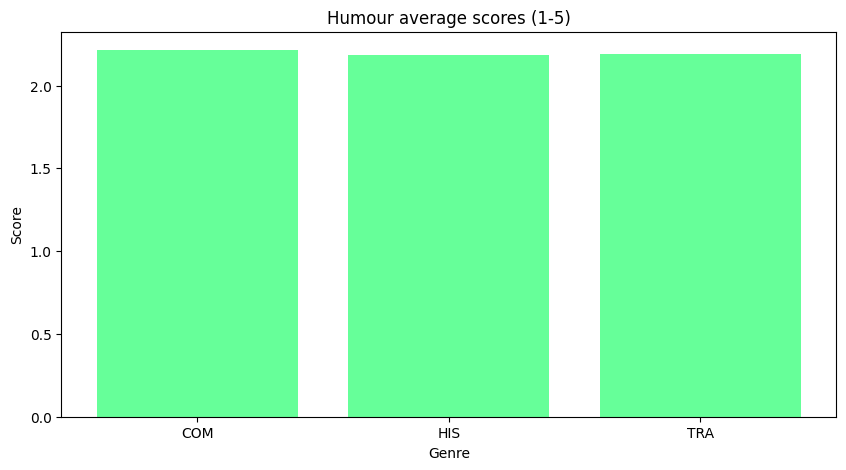

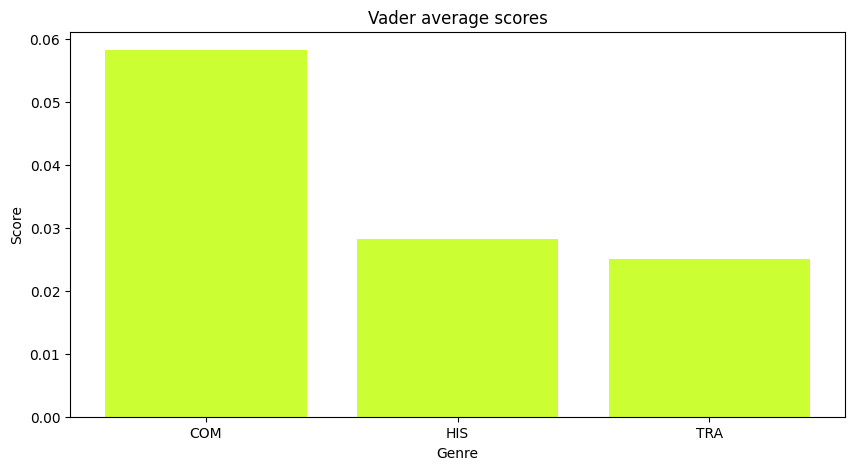

In [46]:
# run the first part of question one

run_q1_pt1()

Character: KING.
VADER Score for KING.: 0.10641303116147313
anger: 5.094130675526024%
anticipation: 11.738648947951273%
disgust: 6.755260243632337%
fear: 6.976744186046512%
joy: 14.06423034330011%
negative: 16.27906976744186%
positive: 32.44739756367663%
sadness: 5.094130675526024%
surprise: 6.64451827242525%
trust: 22.03765227021041%
Average percentage of emotional words used for calculation: 24.01595744680851%


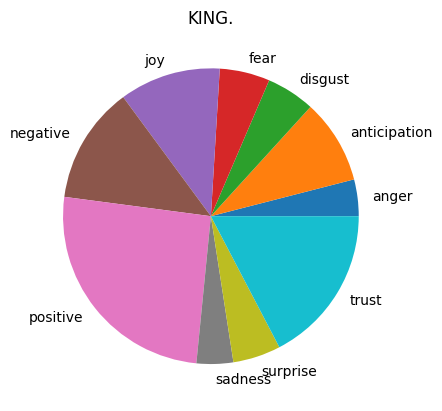

Character: WOLSEY.
VADER Score for WOLSEY.: 0.18943856502242165
anger: 7.514450867052023%
anticipation: 13.728323699421965%
disgust: 6.6473988439306355%
fear: 9.393063583815028%
joy: 14.017341040462428%
negative: 17.485549132947977%
positive: 36.5606936416185%
sadness: 7.514450867052023%
surprise: 7.514450867052023%
trust: 24.277456647398843%
Average percentage of emotional words used for calculation: 24.10309996516893%


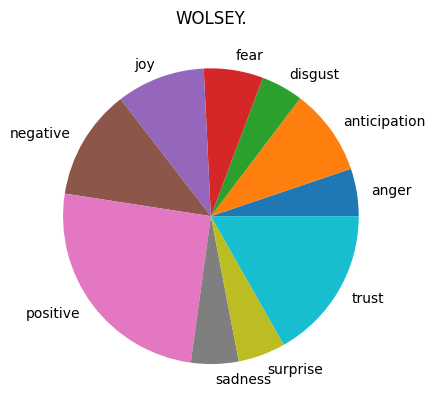

Character: QUEEN KATHERINE.
VADER Score for QUEEN KATHERINE.: 0.0856126829268293
anger: 7.044410413476264%
anticipation: 14.854517611026033%
disgust: 9.494640122511486%
fear: 9.494640122511486%
joy: 15.46707503828484%
negative: 18.529862174578867%
positive: 33.84379785604901%
sadness: 12.557427258805513%
surprise: 7.810107197549771%
trust: 23.43032159264931%
Average percentage of emotional words used for calculation: 23.313102463405926%


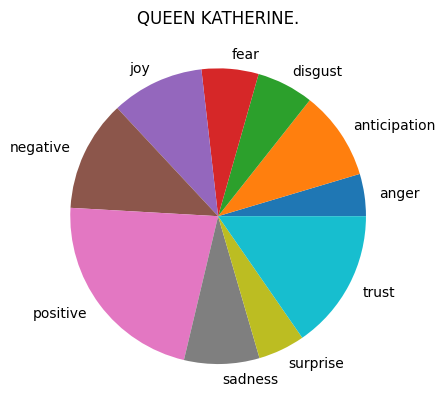

Character: PROSPERO.
VADER Score for PROSPERO.: 0.06056281588447652
anger: 9.12820512820513%
anticipation: 9.538461538461538%
disgust: 6.051282051282051%
fear: 9.743589743589745%
joy: 10.461538461538462%
negative: 19.17948717948718%
positive: 27.692307692307693%
sadness: 9.846153846153847%
surprise: 7.076923076923077%
trust: 13.948717948717949%
Average percentage of emotional words used for calculation: 23.914643119941132%


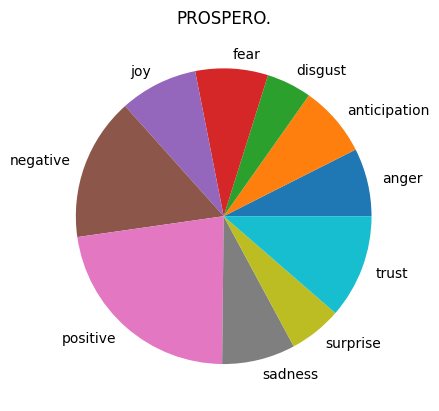

Character: MIRANDA.
VADER Score for MIRANDA.: 0.10028974358974359
anger: 5.288461538461538%
anticipation: 10.576923076923077%
disgust: 5.769230769230769%
fear: 10.576923076923077%
joy: 13.461538461538462%
negative: 13.461538461538462%
positive: 35.09615384615385%
sadness: 8.653846153846153%
surprise: 7.6923076923076925%
trust: 25.48076923076923%
Average percentage of emotional words used for calculation: 23.397075365579305%


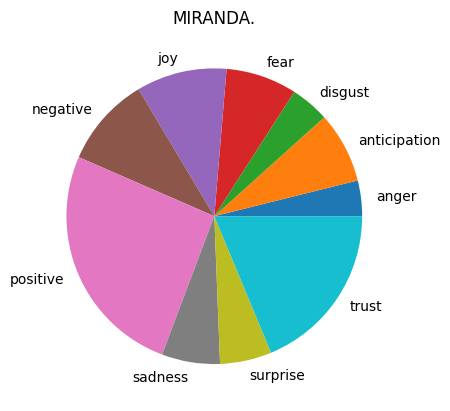

Character: ARIEL.
VADER Score for ARIEL.: 0.02340378787878788
anger: 7.575757575757576%
anticipation: 8.712121212121213%
disgust: 6.25%
fear: 11.931818181818182%
joy: 8.712121212121213%
negative: 17.992424242424242%
positive: 25.189393939393938%
sadness: 11.174242424242424%
surprise: 4.356060606060606%
trust: 12.121212121212121%
Average percentage of emotional words used for calculation: 25.43352601156069%


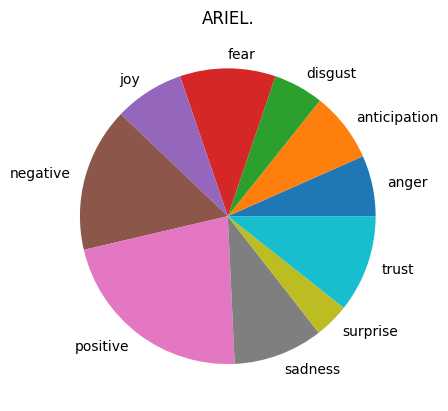

Character: ROMEO.
VADER Score for ROMEO.: 0.058489462365591424
anger: 11.510791366906476%
anticipation: 12.589928057553957%
disgust: 8.56115107913669%
fear: 13.66906474820144%
joy: 17.697841726618705%
negative: 21.72661870503597%
positive: 30.35971223021583%
sadness: 15.107913669064748%
surprise: 9.20863309352518%
trust: 14.964028776978417%
Average percentage of emotional words used for calculation: 26.256139025311676%


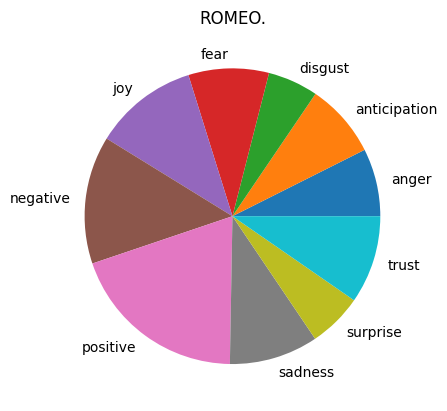

Character: JULIET.
VADER Score for JULIET.: 0.05715846645367413
anger: 8.967674661105319%
anticipation: 15.641293013555787%
disgust: 7.716371220020855%
fear: 13.138686131386862%
joy: 17.72679874869656%
negative: 20.855057351407716%
positive: 30.86548488008342%
sadness: 12.408759124087592%
surprise: 9.071949947862358%
trust: 20.5422314911366%
Average percentage of emotional words used for calculation: 25.89792060491493%


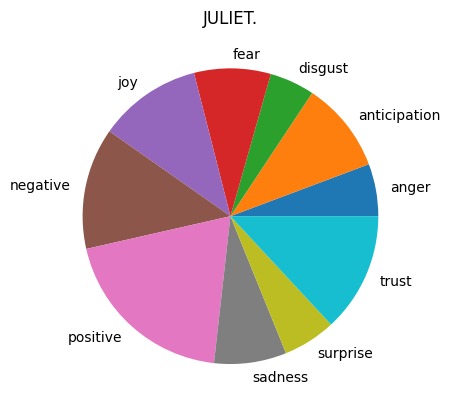

Character: BENVOLIO.
VADER Score for BENVOLIO.: -0.009257647058823527
anger: 13.286713286713287%
anticipation: 8.391608391608392%
disgust: 5.244755244755245%
fear: 10.839160839160838%
joy: 9.090909090909092%
negative: 23.426573426573427%
positive: 18.88111888111888%
sadness: 11.888111888111888%
surprise: 4.545454545454546%
trust: 11.188811188811188%
Average percentage of emotional words used for calculation: 25.512934879571812%


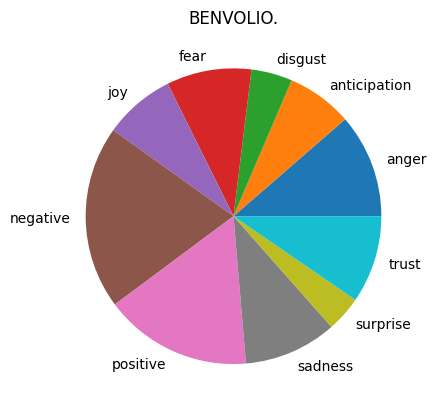

Character: MERCUTIO.
VADER Score for MERCUTIO.: 0.05093293413173655
anger: 9.851301115241636%
anticipation: 11.338289962825279%
disgust: 8.364312267657994%
fear: 8.736059479553903%
joy: 13.197026022304833%
negative: 20.260223048327138%
positive: 25.8364312267658%
sadness: 8.364312267657994%
surprise: 8.921933085501859%
trust: 13.011152416356877%
Average percentage of emotional words used for calculation: 23.794781070322866%


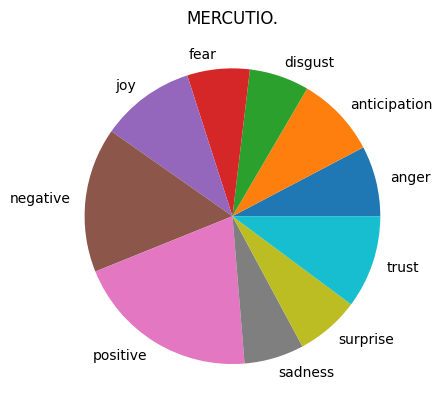

In [61]:
# run the second part of question one
run_q1_pt2()

Question Two

Firstly, the comparisons we are going to run:

Shakespeare's plays vs Marlowe's plays

Shakespeare's poems vs Marlowe's poems

Shakespeare's plays vs Bacon's essays

Shakespeare's sonnets vs Bacon's essays

Shaksepare's sonnets vs Earl of Oxford's poems

Shakespeare's poems vs Earl of Oxford's poems

The below cell loads in all of the appropriate texts to make the comparisons above.

Watch out for the local file - de Vere's poems. This ('earl-oxford.txt') needs to be loaded in manually.

In [48]:
# load in files

# MARLOWE

'''
Dido, Queen of Carthage, 1585/6, based on Virgil’s Aeneid
The First Part of Tamburlaine the Great, 1586/7, an heroic drama
The Second part of Tamburlaine the Great, 1587, an heroic drama
The Jew of Malta, 1589, an early example of the tragicomedy form and the inspiration for Shakespeare’s The Merchant of Venice.
Doctor Faustus, 1589, a dark comedy about the over-reaching nature of ambition
Edward the Second, 1592, a moving tragedy exploring the reign of a weak and flawed king
The Massacre at Paris, 1592, a bold depiction of the murders and scandals instigated by the French Court at the end of the fifteenth century
'''

# dido
# note: needs '_' to be removed.
!wget 'https://www.gutenberg.org/cache/epub/16169/pg16169.txt'
dido = open('pg16169.txt').read()

# tamburlaine
!wget 'https://www.gutenberg.org/cache/epub/1094/pg1094.txt'
tam1 = open('pg1094.txt').read()
!wget 'https://www.gutenberg.org/cache/epub/1589/pg1589.txt'
tam2 = open('pg1589.txt').read()

# Jew of Malta
!wget 'https://www.gutenberg.org/cache/epub/901/pg901.txt'
malta = open('pg901.txt').read()

# Faustus
!wget 'https://www.gutenberg.org/cache/epub/779/pg779.txt'
faustus = open('pg779.txt').read()

# edward ii
!wget 'https://www.gutenberg.org/cache/epub/20288/pg20288.txt'
edward = open('pg20288.txt').read()

# massacre
!wget 'https://www.gutenberg.org/cache/epub/1496/pg1496.txt'
massacre = open('pg1496.txt').read()

# marlowe collected poems - needs trimming
!wget 'https://www.gutenberg.org/cache/epub/20356/pg20356.txt'
marlowe_poems = open('pg20356.txt').read()

# BACONATOR
!wget 'https://www.gutenberg.org/cache/epub/575/pg575.txt'
bacon_essays = open('pg575.txt').read()

# DE VERE
# LOCAL FILE ALERT BEEP BEEP BEEP
# CHANGE FILEPATH TO WHAEVER IS DESIRED.
# from https://shakespeareoxfordfellowship.org/poems-of-edward-de-vere/
oxford_filepath = '/content/drive/MyDrive/earl-oxford.txt'
oxford_poems = open(oxford_filepath).read()


# First shakespeare poem -  A LOVER'S COMPLAINT
text = []
shakespeare_splitlines = shakespeare.split('\n')
f = open('/content/' + 'SHAKESPEARE POEMS' + '.txt', 'w+')
for line in shakespeare_splitlines:
  if line == "A LOVER’S COMPLAINT":
    text = shakespeare_splitlines[shakespeare_splitlines.index(line):]
raw_text = ' '.join(text)
raw_shakey_poems_text = raw_text[:-18550]
f.write(raw_shakey_poems_text)
f.close()


--2024-01-09 08:47:23--  https://www.gutenberg.org/cache/epub/16169/pg16169.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106260 (104K) [text/plain]
Saving to: ‘pg16169.txt’

pg16169.txt         100%[===================>] 103.77K  --.-KB/s    in 0.08s   

2024-01-09 08:47:23 (1.31 MB/s) - ‘pg16169.txt’ saved [106260/106260]

--2024-01-09 08:47:23--  https://www.gutenberg.org/cache/epub/1094/pg1094.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184496 (180K) [text/plain]
Saving to: ‘pg1094.txt’

pg1094.txt          100%[===================>] 180.17K  --.-KB/s    in 0.08s   

2024-01-09 08:47:23 (2.26 MB

In [49]:
#preprocesses text for question two
# removes '_' which is present in some plays
# removes uppercase words (names, places) that are not one letter
# lowercases words, tokenises, and keep full stops, but remove other non-alphas.

def preprocess_q2(text):
    text = ''.join([letter for letter in text if letter != '_'])
    text = ' '.join([word for word in text.split() if not (word.isupper() and len(word) > 1)])
    words = [word.lower() for word in nltk.word_tokenize(text) if word == "." or word.isalpha()]
    return words



Consolidating/cutting texts

The below cell performs a series of actions on texts to suit their purposes. It selects twelve shakespeare plays at random, six to compare against Marlowe's collection of plays (so that the sizes of the texts are approximately the same - shakespeare's work is significantly larger than marlowe's) and six to compare against the first six for a benchmark. The code ensures that two of the same play are not selected.

It also trims down the texts and removes any bookends that were not a part of the original text, and puts all of them through preprocessing.

In [50]:
# shakespeare's collected plays = six plays, two sets, two from each genre, selected at random.
already_chosen = []
shakespeare_collected_plays = ""
shakespeare_collected_plays_2 = ""
for category in shakey_corpus.categories():
  fileids = shakey_corpus.fileids(category)
  for i in range(0,4):
    fileid = random.choice(fileids)
    while fileid in already_chosen:
      fileid = random.choice(fileids)
    already_chosen.append(fileid)
    if i < 2:
      shakespeare_collected_plays += " "
      shakespeare_collected_plays += shakey_corpus.raw(fileid)
    else:
      shakespeare_collected_plays_2 += " "
      shakespeare_collected_plays_2 += shakey_corpus.raw(fileid)
shakespeare_collected_plays_processed = preprocess_q2(shakespeare_collected_plays)
shakespeare_collected_plays_2_processed = preprocess_q2(shakespeare_collected_plays_2)

#collect and process all of shakespeare's poems

shakespeare_collected_poems = raw_shakey_poems_text
shakespeare_collected_poems_processed = preprocess_q2(shakespeare_collected_poems)

#trim, collect and process all of marlowe's poems
marlowe_poems_trimmed = marlowe_poems[3100:-18500]
marlowe_poems_processed = preprocess_q2(marlowe_poems_trimmed)

# trim, collect and combine, then process, all of marlowe's plays
marlowe_collected_plays = ""
marlowe_no_bookends = [
malta[5350:-51090],
dido[5300:-18520],
tam1[8150:-52022],
tam2[3200:-58665],
faustus[1990:-62092],
edward[1580:-18500],
massacre[3865:-18584],
]
for text in marlowe_no_bookends:
  marlowe_collected_plays += text + " "

marlowe_collected_plays_processed = preprocess_q2(marlowe_collected_plays)

#collect, trim, and process all of the Earl of Oxford's poems

oxford_poems_trimmed = oxford_poems[:8330] + " " + oxford_poems[13865:]
oxford_poems_processed = preprocess_q2(oxford_poems_trimmed)

# collect, trim, and process the first 40 of shakespeare's sonnets to compare against the Earl of Oxford
# this makes it a size similar to oxford's poems

shakespeare_sonnets = open('/content/THE SONNETS.txt').read()
shakespeare_sonnets_trimmed = shakespeare_sonnets[2269:]
shakespeare_sonnets_shorten = []
for word in shakespeare_sonnets_trimmed.split():
  if word.isnumeric() and int(word) >= 40:
    break
  else:
    shakespeare_sonnets_shorten.append(word)
shortened = ' '.join(shakespeare_sonnets_shorten)
shakespeare_sonnets_processed = preprocess_q2(shortened)
shakespeare_all_sonnets_processed = preprocess_q2(shakespeare_sonnets_trimmed)

# select three plays at random (one per genre) to compare against francis bacon's essays
# three is a similar size to bacon's collected essays

shakey_bacon_selected = []
shakespeare_bacon_plays = ""
for category in shakey_corpus.categories():
  fileids = shakey_corpus.fileids(category)
  for i in range(0,1):
    fileid = random.choice(fileids)
    shakey_bacon_selected.append(fileid)
    shakespeare_bacon_plays += " "
    shakespeare_bacon_plays += shakey_corpus.raw(fileid)
shakespeare_bacon_plays_processed = preprocess_q2(shakespeare_bacon_plays)

#collect, trim, combine and process bacon's essays

bacon_essays_trimmed = bacon_essays[3529:-22026]
bacon_essays_processed = preprocess_q2(bacon_essays_trimmed)



In [51]:
# run to look for plays selected randomly:
#shakey_bacon_selected
#already_chosen

In [52]:
# create the texts and lists used in the question_2 method
# makes an nltk Text,
#nltk Text with no stopwords,
# fdist of the Text with no stopwords,
# pos_tagged object of the Text.


# shakey plays vs marlowe plays

marlowe_text = Text(marlowe_collected_plays_processed)
shakespeare_text = Text(shakespeare_collected_plays_processed)
marlowe_no_stop = [word for word in marlowe_collected_plays_processed if word not in stopwords.words('english')]
shakespeare_no_stop = [word for word in shakespeare_collected_plays_processed if word not in stopwords.words('english')]
marlowe_text_no_stop = Text(marlowe_no_stop)
shakespeare_text_no_stop = Text(shakespeare_no_stop)
marlowe_fdist = FreqDist(marlowe_text_no_stop)
shakespeare_fdist = FreqDist(shakespeare_text_no_stop)
shakespeare_plays_pos = nltk.pos_tag(shakespeare_text)
marlowe_plays_pos = nltk.pos_tag(marlowe_text)

# shakespeare comparison

shakespeare_2_text = Text(shakespeare_collected_plays_2_processed)
shakespeare_2_no_stop = [word for word in shakespeare_collected_plays_2_processed if word not in stopwords.words('english')]
shakespeare_text_2_no_stop = Text(shakespeare_2_no_stop)
shakespeare_2_fdist = FreqDist(shakespeare_text_2_no_stop)
shakespeare_2_plays_pos = nltk.pos_tag(shakespeare_2_text)

# shakey poems

shakespeare_poems_text = Text(shakespeare_collected_poems_processed)
shakespeare_poems_no_stop = [word for word in shakespeare_collected_poems_processed if word not in stopwords.words('english')]
shakespeare_poems_text_no_stop = Text(shakespeare_poems_no_stop)
shakespeare_poems_fdist = FreqDist(shakespeare_poems_text_no_stop)
shakespeare_poems_pos = nltk.pos_tag(shakespeare_poems_text)

# earl of oxford poems

oxford_poems_text = Text(oxford_poems_processed)
oxford_poems_no_stop = [word for word in oxford_poems_processed if word not in stopwords.words('english')]
oxford_poems_text_no_stop = Text(oxford_poems_no_stop)
oxford_poems_fdist = FreqDist(oxford_poems_text_no_stop)
oxford_poems_pos = nltk.pos_tag(oxford_poems_text)

# shakey sonnets - first 40

shakespeare_sonnets_text = Text(shakespeare_sonnets_processed)
shakespeare_sonnets_no_stop = [word for word in shakespeare_sonnets_processed if word not in stopwords.words('english')]
shakespeare_sonnets_text_no_stop = Text(shakespeare_sonnets_no_stop)
shakespeare_sonnets_fdist = FreqDist(shakespeare_sonnets_text_no_stop)
shakespeare_sonnets_pos = nltk.pos_tag(shakespeare_sonnets_text)

# shakey sonnets - all

shakespeare_all_sonnets_text = Text(shakespeare_all_sonnets_processed)
shakespeare_all_sonnets_no_stop = [word for word in shakespeare_all_sonnets_processed if word not in stopwords.words('english')]
shakespeare_all_sonnets_text_no_stop = Text(shakespeare_all_sonnets_no_stop)
shakespeare_all_sonnets_fdist = FreqDist(shakespeare_all_sonnets_text_no_stop)
shakespeare_all_sonnets_pos = nltk.pos_tag(shakespeare_all_sonnets_text)

# bacon essays vs shakespeare plays

shakespeare_bacon_text = Text(shakespeare_bacon_plays_processed)
shakespeare_bacon_no_stop = [word for word in shakespeare_bacon_plays_processed if word not in stopwords.words('english')]
shakespeare_bacon_text_no_stop = Text(shakespeare_bacon_no_stop)
shakespeare_bacon_fdist = FreqDist(shakespeare_bacon_text_no_stop)
shakespeare_bacon_pos = nltk.pos_tag(shakespeare_bacon_text)

bacon_essays_text = Text(bacon_essays_processed)
bacon_essays_no_stop = [word for word in bacon_essays_processed if word not in stopwords.words('english')]
bacon_essays_text_no_stop = Text(bacon_essays_no_stop)
bacon_essays_fdist = FreqDist(bacon_essays_text_no_stop)
bacon_essays_pos = nltk.pos_tag(bacon_essays_text)

# marlowe poems

marlowe_poems_text = Text(marlowe_poems_processed)
marlowe_poems_no_stop = [word for word in marlowe_poems_processed if word not in stopwords.words('english')]
marlowe_poems_text_no_stop = Text(marlowe_poems_no_stop)
marlowe_poems_fdist = FreqDist(marlowe_poems_text_no_stop)
marlowe_poems_pos = nltk.pos_tag(marlowe_poems_text)


In [53]:
# most common words function
# writes results to file
def most_common(t1, t2, n1, n2, outfile):
  t1_fd_common = t1.most_common(50)
  t2_fd_common = t2.most_common(50)

  shared_commons = []
  all_common_words = set()

  similarity_avg = []

  for entry in t1_fd_common:
    word, count = entry
    all_common_words.add(word)
    for entry2 in t2_fd_common:
      word2, count2 = entry2
      all_common_words.add(word2)
      if word == word2:
        shared_commons.append(word)

  # compares most top 50 frequent words using word2vec model and calculates an average

  for i in range(0, len(t1_fd_common)):
    try:
      similarity_avg.append(google_w2v.similarity(t1_fd_common[i][0], t2_fd_common[i][0]))
    except KeyError:
      pass

  total = 0
  for avg in similarity_avg:
    total += avg
  print("Average word similarity: " + str(total / len(similarity_avg)) + '\n')
  outfile.write("Average Word2Vec similarity (top 50 words per text): " + str(total / len(similarity_avg)) + '\n')

  word_2_vec_similarity_y.append(total / len(similarity_avg))

  # calculate all words in the top 50 list that both texts share

  shared_commons
  not_shared_commons = []
  for word in all_common_words:
    if word not in shared_commons:
      not_shared_commons.append(word)

  print(shared_commons)
  outfile.write("Shared Common Words: " + '\n')
  for item in shared_commons:
    outfile.write(" " + item + '\n')
  print(len(shared_commons) / len(all_common_words) * 100)
  outfile.write("Percentage of Shared Common Words out of Top 50 Most Frequent (per text): " + str(len(shared_commons) / len(all_common_words) * 100) + "%" + '\n')
  outfile.write('\n')

In [54]:
# unique tokens function
# takes two texts, and their names
def unique_tokens(t1, t2, n1, n2, outfile):
  t1_tokens = set(t1)
  t2_tokens = set(t2)

  # make a combined list of the types
  combined = list(t1_tokens) + list(t2_tokens)
  # convert to a set to that there are no duplicates
  set_combined = set(combined)

  # shared tokens out of the combined token list

  print("Shared types out of combined: " + str((len(combined) - len(set_combined))/len(combined) * 100) + "%" + '\n')
  outfile.write("Shared types out of combined: " + str((len(combined) - len(set_combined))/len(combined) * 100) + "%" + '\n')

  shared_tokens_from_combined_y.append((len(combined) - len(set_combined))/len(combined) * 100)

  # below code finds the percentage of one text's tokens that are in the other.

  print("Shared types out of " + n1 + ": " + str((len(combined) - len(list(set_combined))) / len(t1_tokens) * 100) + "%" + '\n')
  outfile.write("Shared types out of " + n1 + ": " + str((len(combined) - len(list(set_combined))) / len(t1_tokens) * 100) + "%" + '\n')

  print("Shared types out of " + n2 +": " + str((len(combined) - len(list(set_combined))) / len(t2_tokens) * 100) + "%" + '\n')
  outfile.write("Shared types out of " + n2 +": " + str((len(combined) - len(list(set_combined))) / len(t2_tokens) * 100) + "%" + '\n')

  outfile.write('\n')



In [55]:
# bigrams method

def bigrams(t1, t2, t1_pos, t2_pos, freq, outfile):
  bigram_measures = nltk.collocations.BigramAssocMeasures()

  finder_one = BigramCollocationFinder.from_words(t1)
  finder_two = BigramCollocationFinder.from_words(t2)

  finder_one_pos = BigramCollocationFinder.from_words(t for w, t in
  t1_pos)
  finder_two_pos = BigramCollocationFinder.from_words(t for w, t in
  t2_pos)

  finder_one_pos.apply_freq_filter(freq)
  finder_two_pos.apply_freq_filter(freq)

  finder_one.apply_freq_filter(freq)
  finder_two.apply_freq_filter(freq)

  # finds both shared common word bigrams and shared common POS bigrams

  shared_commons = []

  for entry in finder_one.nbest(bigram_measures.pmi, 50):
    for entry2 in finder_two.nbest(bigram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared words:')
  print(shared_commons)

  outfile.write("Shared Common Word Bigrams" + '\n')
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')


  shared_commons = []

  for entry in finder_one_pos.nbest(bigram_measures.pmi, 50):
    for entry2 in finder_two_pos.nbest(bigram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared POS:')
  print(shared_commons)

  outfile.write("Shared Common POS Bigrams" + '\n')
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')

  outfile.write('\n')

In [56]:
# trigrams method

def trigrams(t1, t2, t1_pos, t2_pos, freq, outfile):
  trigram_measures = nltk.collocations.TrigramAssocMeasures()

  finder_one = TrigramCollocationFinder.from_words(t1)
  finder_two = TrigramCollocationFinder.from_words(t2)

  finder_one_pos = TrigramCollocationFinder.from_words(t for w, t in
  t1_pos)
  finder_two_pos = TrigramCollocationFinder.from_words(t for w, t in
  t2_pos)

  finder_one_pos.apply_freq_filter(freq)
  finder_two_pos.apply_freq_filter(freq)

  finder_one.apply_freq_filter(freq)
  finder_two.apply_freq_filter(freq)

  #uses trigramcollocationfinder to find shared word trigrams and shared POS bigrams


  shared_commons = []

  for entry in finder_one.nbest(trigram_measures.pmi, 50):
    for entry2 in finder_two.nbest(trigram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared words:')
  print(shared_commons)

  outfile.write("Shared Common Word Trigrams" + '\n')
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')


  shared_commons = []

  for entry in finder_one_pos.nbest(trigram_measures.pmi, 50):
    for entry2 in finder_two_pos.nbest(trigram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared POS:')
  print(shared_commons)

  outfile.write("Shared Common POS Trigrams"+ '\n')
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')

  outfile.write('\n')

In [57]:
# quadgrams method

def quadgrams(t1, t2, t1_pos, t2_pos, freq, outfile):
  quadgram_measures = nltk.collocations.QuadgramAssocMeasures()

  finder_one = QuadgramCollocationFinder.from_words(t1)
  finder_two = QuadgramCollocationFinder.from_words(t2)

  finder_one_pos = QuadgramCollocationFinder.from_words(t for w, t in
  t1_pos)
  finder_two_pos = QuadgramCollocationFinder.from_words(t for w, t in
  t2_pos)

  finder_one_pos.apply_freq_filter(freq)
  finder_two_pos.apply_freq_filter(freq)

  finder_one.apply_freq_filter(freq)
  finder_two.apply_freq_filter(freq)

  #works the same as the above methods for quadgrams.


  shared_commons = []

  for entry in finder_one.nbest(quadgram_measures.pmi, 50):
    for entry2 in finder_two.nbest(quadgram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared words:')
  print(shared_commons)

  outfile.write("Shared Common Word Quadgrams" + '\n' )
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')


  shared_commons = []

  for entry in finder_one_pos.nbest(quadgram_measures.pmi, 50):
    for entry2 in finder_two_pos.nbest(quadgram_measures.pmi, 50):
      if entry == entry2:
        shared_commons.append(entry)
  print('Shared POS:')
  print(shared_commons)

  outfile.write("Shared Common POS Quadgrams" + '\n' )
  for item in shared_commons:
    outfile.write(" " + ','.join(item) + '\n')

  outfile.write('\n')

Question Two

This method runs all of the above methods to analyse all of the texts against shakespeare using the comparisons discussed above. It outputs data into the console and into files, as well as producing bar graphs for the word2vec and shared types.

In [58]:
def run_q2():
  datetime_NZ = datetime.now(tz_NZ)
  # run all comparisons from here

  global word_2_vec_similarity_y
  global word_2_vec_similarity_x

  word_2_vec_similarity_y = []
  word_2_vec_similarity_x = []

  global shared_tokens_from_combined_y
  global shared_tokens_from_combined_x

  shared_tokens_from_combined_y = []
  shared_tokens_from_combined_x = []


  # shakespeare plays vs marlowe plays
  word_2_vec_similarity_x.append('S(PL)-M(PL)')
  shared_tokens_from_combined_x.append('S(PL)-M(PL)')

  datetime_NZ = datetime.now(tz_NZ)

  outfile = open('/content/reports/q2-shakespeare-plays-vs-marlowe-plays-' + str(datetime_NZ) + '.txt', 'w+')

  print('Most common')
  most_common(shakespeare_fdist, marlowe_fdist, "Shakespeare", "Marlowe", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_no_stop, marlowe_no_stop, 'Shakespeare', 'Marlowe', outfile)
  print('Bigrams')
  bigrams(shakespeare_text, marlowe_text, shakespeare_plays_pos, marlowe_plays_pos, 10, outfile)
  print('Trigrams')
  trigrams(shakespeare_text, marlowe_text, shakespeare_plays_pos, marlowe_plays_pos, 10, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_text, marlowe_text, shakespeare_plays_pos, marlowe_plays_pos, 10, outfile)

  outfile.close()

  # shakespeare poems vs marlowe poems

  word_2_vec_similarity_x.append('S(PO)-M(PO)')
  shared_tokens_from_combined_x.append('S(PO)-M(PO)')

  outfile = open('/content/reports/q2-shakespeare-poems-vs-marlowe-poems-' + str(datetime_NZ) + '.txt', 'w+')

  print('Most common')
  most_common(shakespeare_poems_fdist, marlowe_poems_fdist, "Shakespeare", "Marlowe", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_poems_no_stop, marlowe_poems_no_stop, 'Shakespeare', 'Marlowe', outfile)
  print('Bigrams')
  bigrams(shakespeare_poems_text, marlowe_poems_text, shakespeare_poems_pos, marlowe_poems_pos, 5, outfile)
  print('Trigrams')
  trigrams(shakespeare_poems_text, marlowe_poems_text, shakespeare_poems_pos, marlowe_poems_pos, 5, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_poems_text, marlowe_poems_text, shakespeare_poems_pos, marlowe_poems_pos, 5, outfile)

  outfile.close()

  # shakespeare poems vs de vere poems

  word_2_vec_similarity_x.append('S(PO)-O(PO)')
  shared_tokens_from_combined_x.append('S(PO)-O(PO)')

  outfile = open('/content/reports/q2-shakespeare-poems-vs-oxford-poems-' + str(datetime_NZ) + '.txt', 'w+')

  print('Most common')
  most_common(shakespeare_poems_fdist, oxford_poems_fdist, "Shakespeare", "Oxford", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_poems_no_stop, oxford_poems_no_stop, 'Shakespeare', 'Oxford', outfile)
  print('Bigrams')
  bigrams(shakespeare_poems_text, oxford_poems_text, shakespeare_poems_pos, oxford_poems_pos, 3, outfile)
  print('Trigrams')
  trigrams(shakespeare_poems_text, oxford_poems_text, shakespeare_poems_pos, oxford_poems_pos, 3, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_poems_text, oxford_poems_text, shakespeare_poems_pos, oxford_poems_pos, 3, outfile)

  outfile.close()

  # shakey sonnets vs de vere poems

  word_2_vec_similarity_x.append('S(SO)-O(PO)')
  shared_tokens_from_combined_x.append('S(SO)-O(PO)')

  outfile = open('/content/reports/q2-shakespeare-sonnets-vs-oxford-poems-' + str(datetime_NZ) + '.txt', 'w+')


  print('Most common')
  most_common(shakespeare_sonnets_fdist, oxford_poems_fdist, "Shakespeare", "Oxford", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_sonnets_no_stop, oxford_poems_no_stop, 'Shakespeare', 'Oxford', outfile)
  print('Bigrams')
  bigrams(shakespeare_sonnets_text, oxford_poems_text, shakespeare_sonnets_pos, oxford_poems_pos, 1, outfile)
  print('Trigrams')
  trigrams(shakespeare_sonnets_text, oxford_poems_text, shakespeare_sonnets_pos, oxford_poems_pos, 1, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_sonnets_text, oxford_poems_text, shakespeare_sonnets_pos, oxford_poems_pos, 1, outfile)

  outfile.close()

  # shakey plays (3) vs bacon essay collection

  word_2_vec_similarity_x.append('S(PL)-B(ES)')
  shared_tokens_from_combined_x.append('S(PL)-B(ES)')

  outfile = open('/content/reports/q2-shakespeare-plays-vs-bacon-essays-' + str(datetime_NZ) + '.txt', 'w+')


  print('Most common')
  most_common(shakespeare_bacon_fdist, bacon_essays_fdist, "Shakespeare", "Bacon", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_bacon_no_stop, bacon_essays_no_stop, 'Shakespeare', 'Bacon', outfile)
  print('Bigrams')
  bigrams(shakespeare_bacon_text, bacon_essays_text, shakespeare_bacon_pos, bacon_essays_pos, 5, outfile)
  print('Trigrams')
  trigrams(shakespeare_bacon_text, bacon_essays_text, shakespeare_bacon_pos, bacon_essays_pos, 5, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_bacon_text, bacon_essays_text, shakespeare_bacon_pos, bacon_essays_pos, 5, outfile)

  outfile.close()


  # shakey sonnets (all) vs bacon essay collection

  word_2_vec_similarity_x.append('S(SO)-B(ES)')
  shared_tokens_from_combined_x.append('S(SO)-B(ES)')

  outfile = open('/content/reports/q2-shakespeare-sonnets-vs-bacon-essays-' + str(datetime_NZ) + '.txt', 'w+')

  print('Most common')
  most_common(shakespeare_all_sonnets_fdist, bacon_essays_fdist, "Shakespeare", "Bacon", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_all_sonnets_no_stop, bacon_essays_no_stop, 'Shakespeare', 'Bacon', outfile)
  print('Bigrams')
  bigrams(shakespeare_all_sonnets_text, bacon_essays_text, shakespeare_all_sonnets_pos, bacon_essays_pos, 5, outfile)
  print('Trigrams')
  trigrams(shakespeare_all_sonnets_text, bacon_essays_text, shakespeare_all_sonnets_pos, bacon_essays_pos, 5, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_all_sonnets_text, bacon_essays_text, shakespeare_all_sonnets_pos, bacon_essays_pos, 5, outfile)

  outfile.close()

  # shakey vs. shakey (6 vs 6)

  word_2_vec_similarity_x.append('S(PL)-S(PL)')
  shared_tokens_from_combined_x.append('S(PL)-S(PL)')

  outfile = open('/content/reports/q2-shakespeare-plays-vs-shakespeare-plays-' + str(datetime_NZ) + '.txt', 'w+')

  print('Most common')
  most_common(shakespeare_fdist, shakespeare_2_fdist, "Shakespeare", "Shakespeare-2", outfile)
  print('Unique tokens')
  unique_tokens(shakespeare_no_stop, shakespeare_2_no_stop, 'Shakespeare', 'Shakespeare-2', outfile)
  print('Bigrams')
  bigrams(shakespeare_text, shakespeare_2_text, shakespeare_plays_pos, shakespeare_2_plays_pos, 10, outfile)
  print('Trigrams')
  trigrams(shakespeare_text, shakespeare_2_text, shakespeare_plays_pos, shakespeare_2_plays_pos, 10, outfile)
  print('Quadgrams')
  quadgrams(shakespeare_text, shakespeare_2_text, shakespeare_plays_pos, shakespeare_2_plays_pos, 10, outfile)

  outfile.close()
  print('\nGraphs \n\n')
  draw_metrics(word_2_vec_similarity_x, word_2_vec_similarity_y, "Word2Vec average similarity (top 50 words)", "Texts", "Similarity between (-1,1)")
  draw_metrics(shared_tokens_from_combined_x, shared_tokens_from_combined_y, "Shared types from all combined types", "Texts", '% of total combined types')

Most common
Average word similarity: 0.2545183866861321

['.', 'thou', 'shall', 'good', 'thy', 'lord', 'thee', 'come', 'let', 'well', 'would', 'enter', 'love', 'man', 'king', 'know', 'hath', 'one', 'upon', 'may', 'go', 'us', 'see', 'like', 'must', 'make', 'yet', 'take', 'father', 'god', 'men', 'tell', 'exeunt', 'away', 'exit']
53.84615384615385
Unique tokens
Shared types out of combined: 23.27920325761664%

Shared types out of Shakespeare: 44.47047797563262%

Shared types out of Marlowe: 48.85205394831669%

Bigrams
Shared words:
[('mine', 'own'), ('thou', 'shalt'), ('thou', 'hast'), ('thou', 'wilt')]
Shared POS:
[('EX', 'VBZ'), ('PDT', 'DT'), ('WDT', 'VBZ'), ('MD', 'VB'), ('TO', 'VB'), ('VBG', 'RP'), ('RBS', 'JJ'), ('WP', 'VBZ'), ('WP', 'VBD'), ('VBN', 'RP'), ('CD', 'NNS'), ('WDT', 'VBD'), ('VBP', 'VBN'), ('CD', 'WDT'), ('VB', 'RP'), ('NNS', 'VBP'), ('.', 'WP'), ('.', 'WRB'), ('VBD', 'VBN'), ('PRP$', 'NNS'), ('PRP', 'MD'), ('RBR', 'JJ'), ('PRP', 'VBZ'), ('DT', 'JJS'), ('WDT', 'VBP'), (

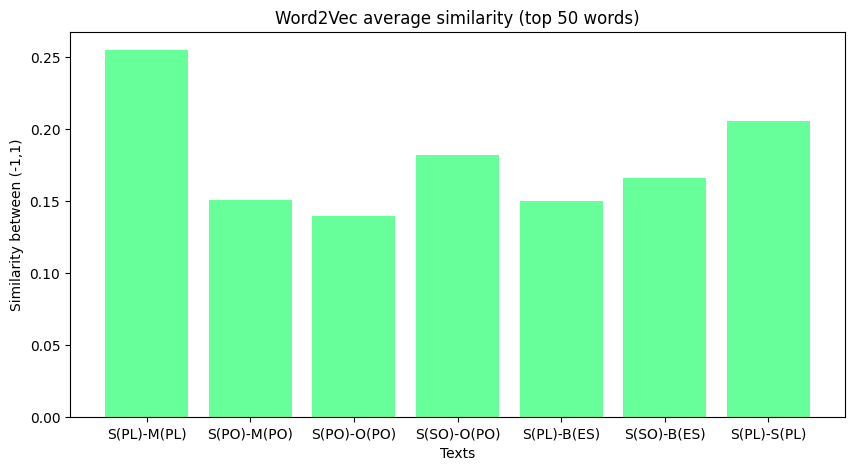

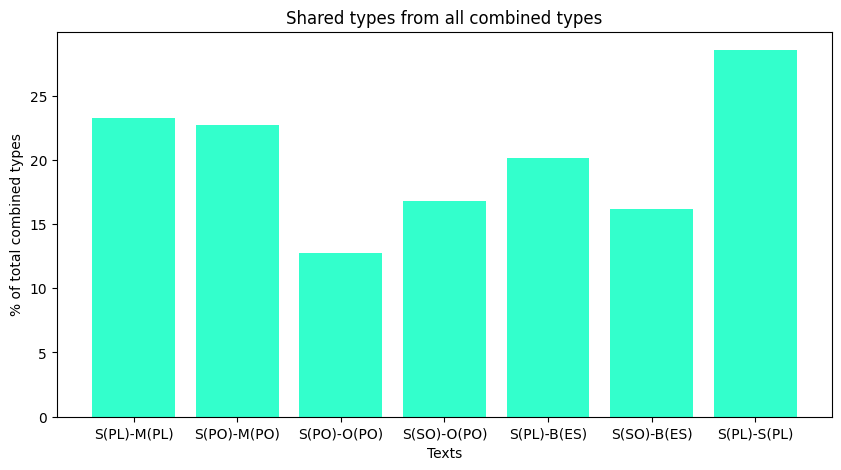

In [59]:
# runs the method for question two
run_q2()

5. Results and Discussion

5.1 Question one

**Comparing genres**

Below are the genre pie charts for the first question:

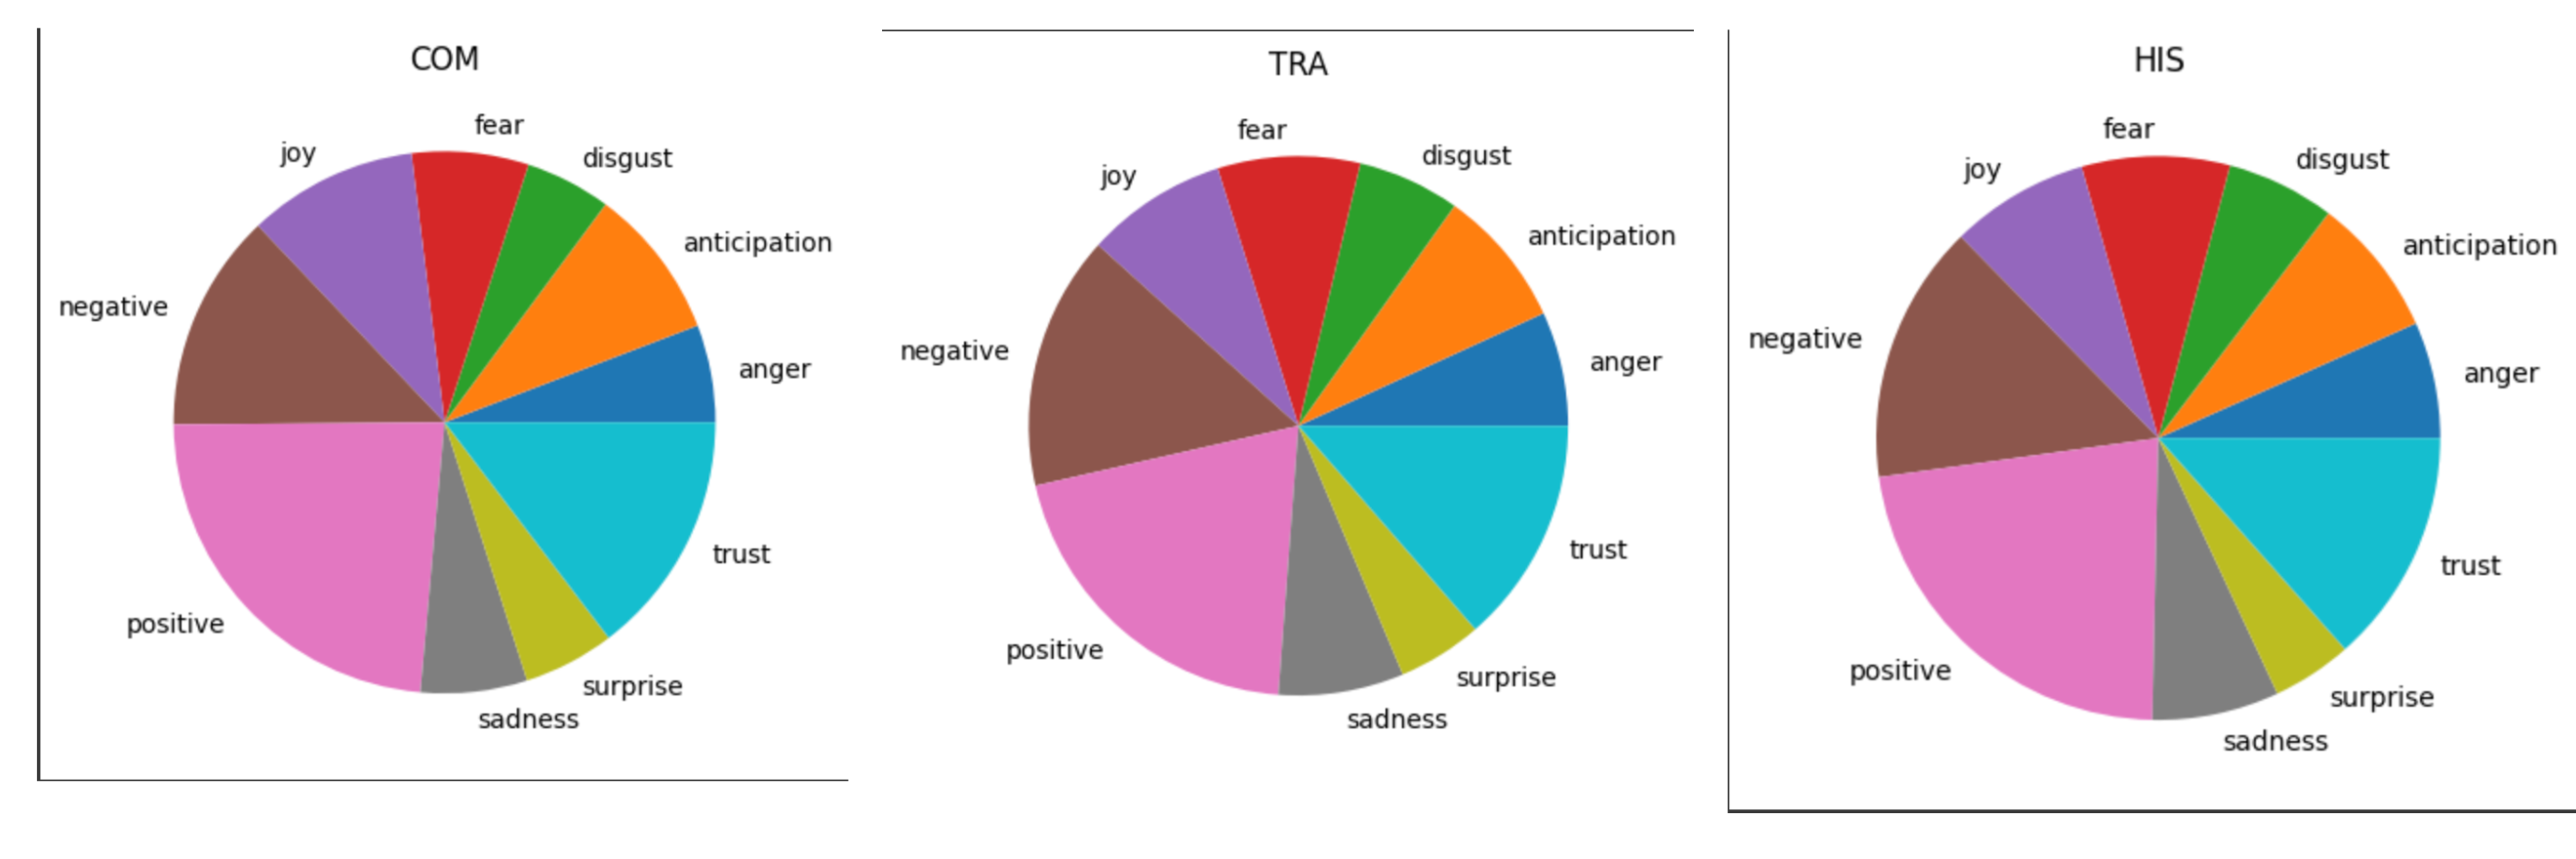

As we can see, the pie charts as quite similar in their proportions of emotional vocabulary. Visible on closer inspection is the clear difference between the comedies and the other two genres; we can see the 'positive' slice and 'joy' slice is larger for comedies than histories and tragedies. Let's look at the numbers:


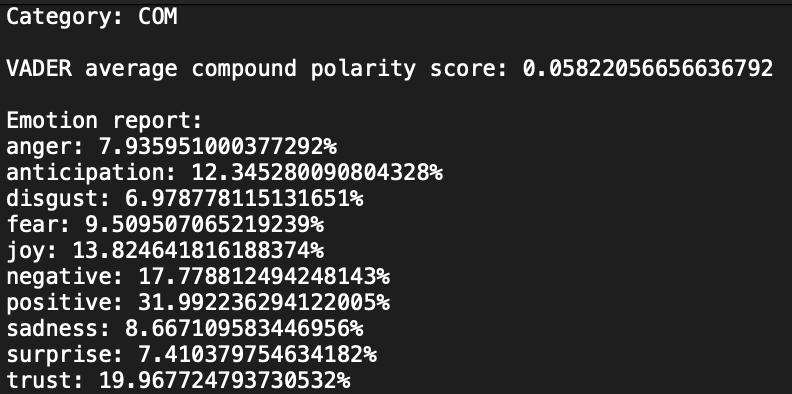

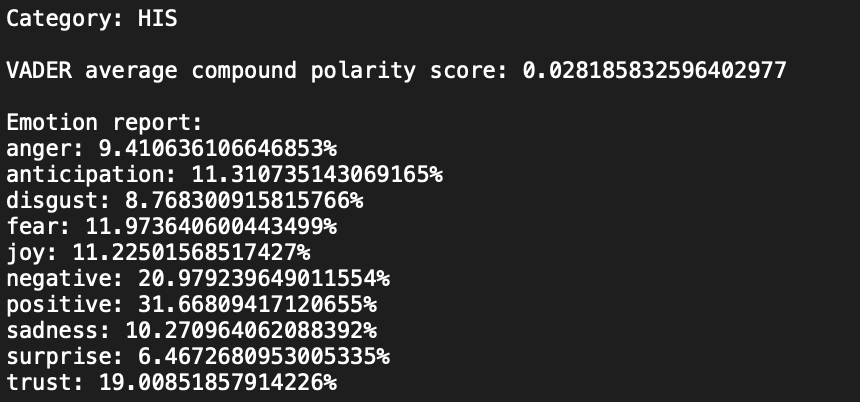

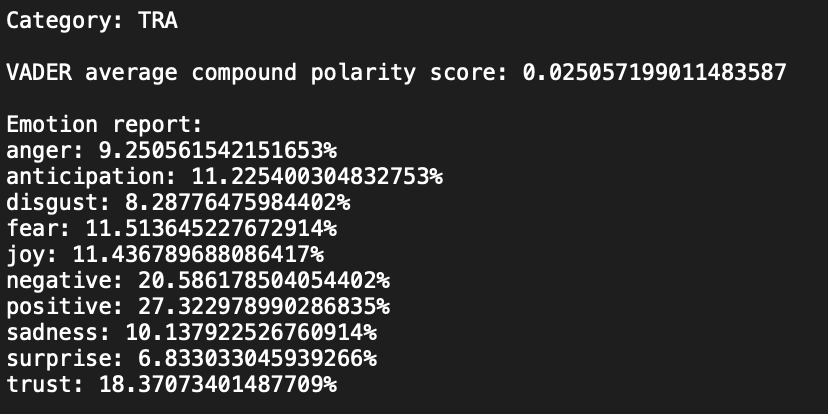

We can see that these numbers don't add up to 100 - that is due to words having multiple attributes - one word can be attributed to multiple emotions. We can see that the differences between these categories are minimal -- they never deviate by more than a few percentage points. It's important to note the proportion of emotional vocab in each category as well -- emotional vocabulary made up an average of ~23% of each play as a whole, over all three categories. The differences, though minimal, still show a trend: histories seem to be a middle ground between tragedies and comedies, but in general more tragic.
Tragedies and histories are very similar (within 1%) for anger, anticipation, disgust, fear, joy, negative, surprise, and trust. Comedies and histories share a similar positive word proportion. Comedies trend higher for trust, surprise, anticipation, and around 2% higher for joy. Comedies trend lower for negative, fear, disgust, and anger.
From these numbers, we've discovered two important findings: firstly, that comedies average higher for emotions with positive connotations and hisories and tragedies average lower, and secondly, that all three genres are quite similar. Multiple explanations could be offered for this phenomenon: the emotional word-list could be missing a significant proportion of archaic emotional vocabulary, which I think would be a reasonable explanation, due to the percentage of total emotional vocabulary being so low. Or, perhaps Shakespeare's works are devoid of concrete emotional vocabulary and instead lots of the emotional meaning comes from the actors. This could be further investigated by comparing shakespeare with a modern play to see the differences in emotional vocabulary.

The bar charts produced by the genre comparison:


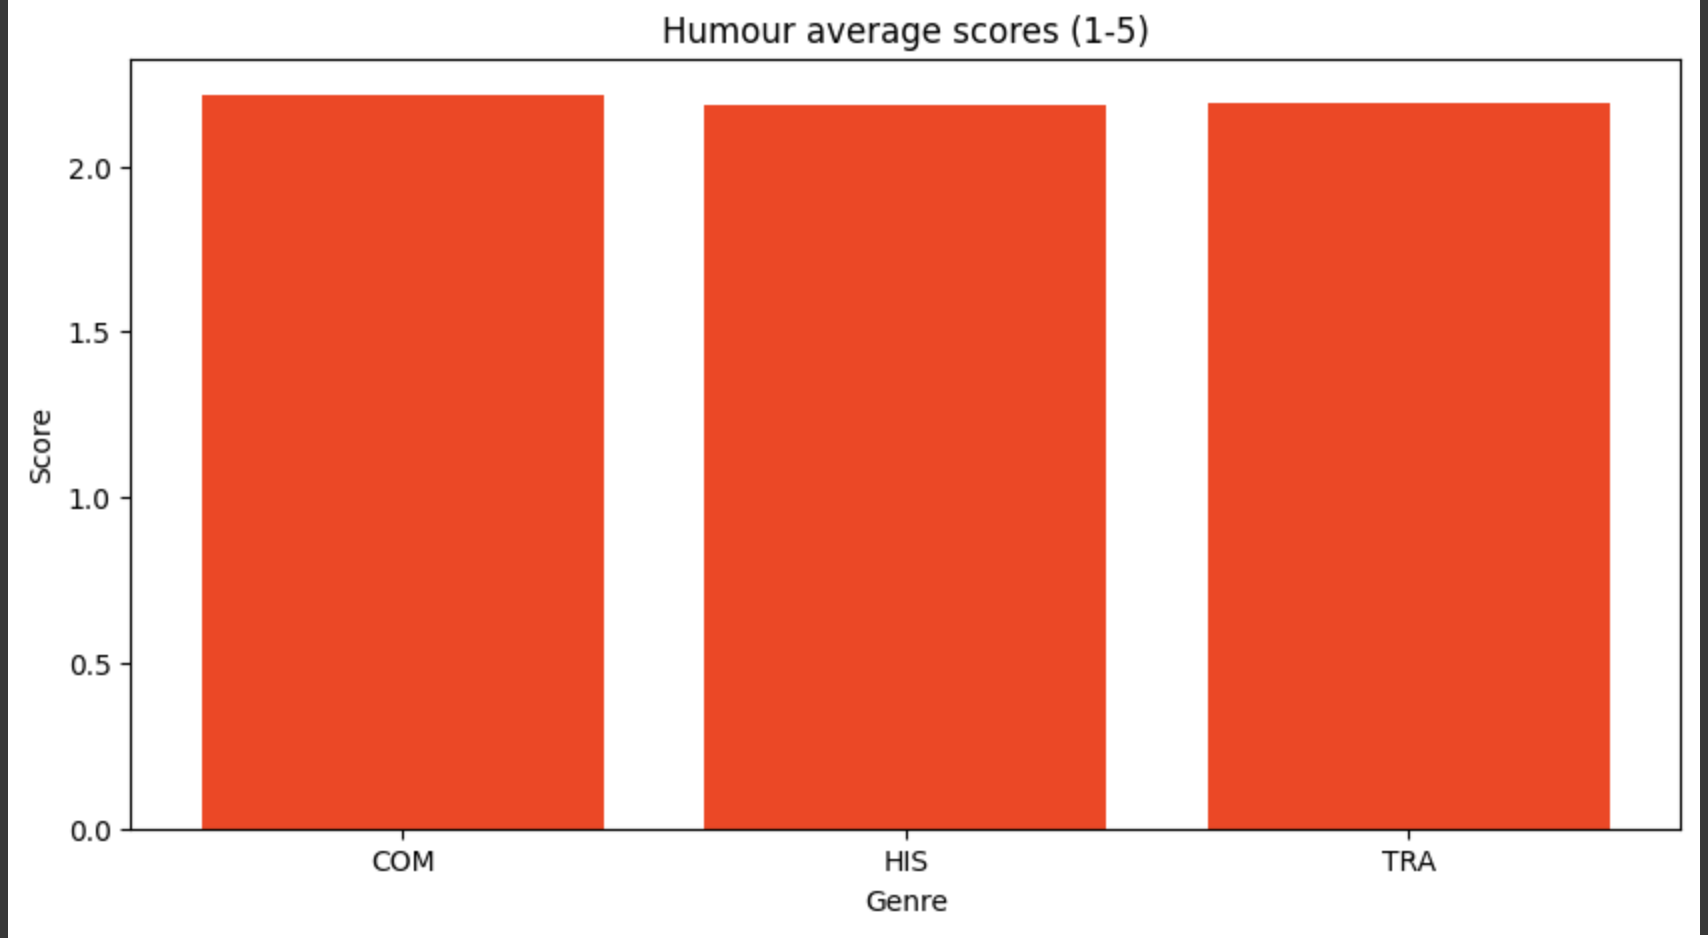

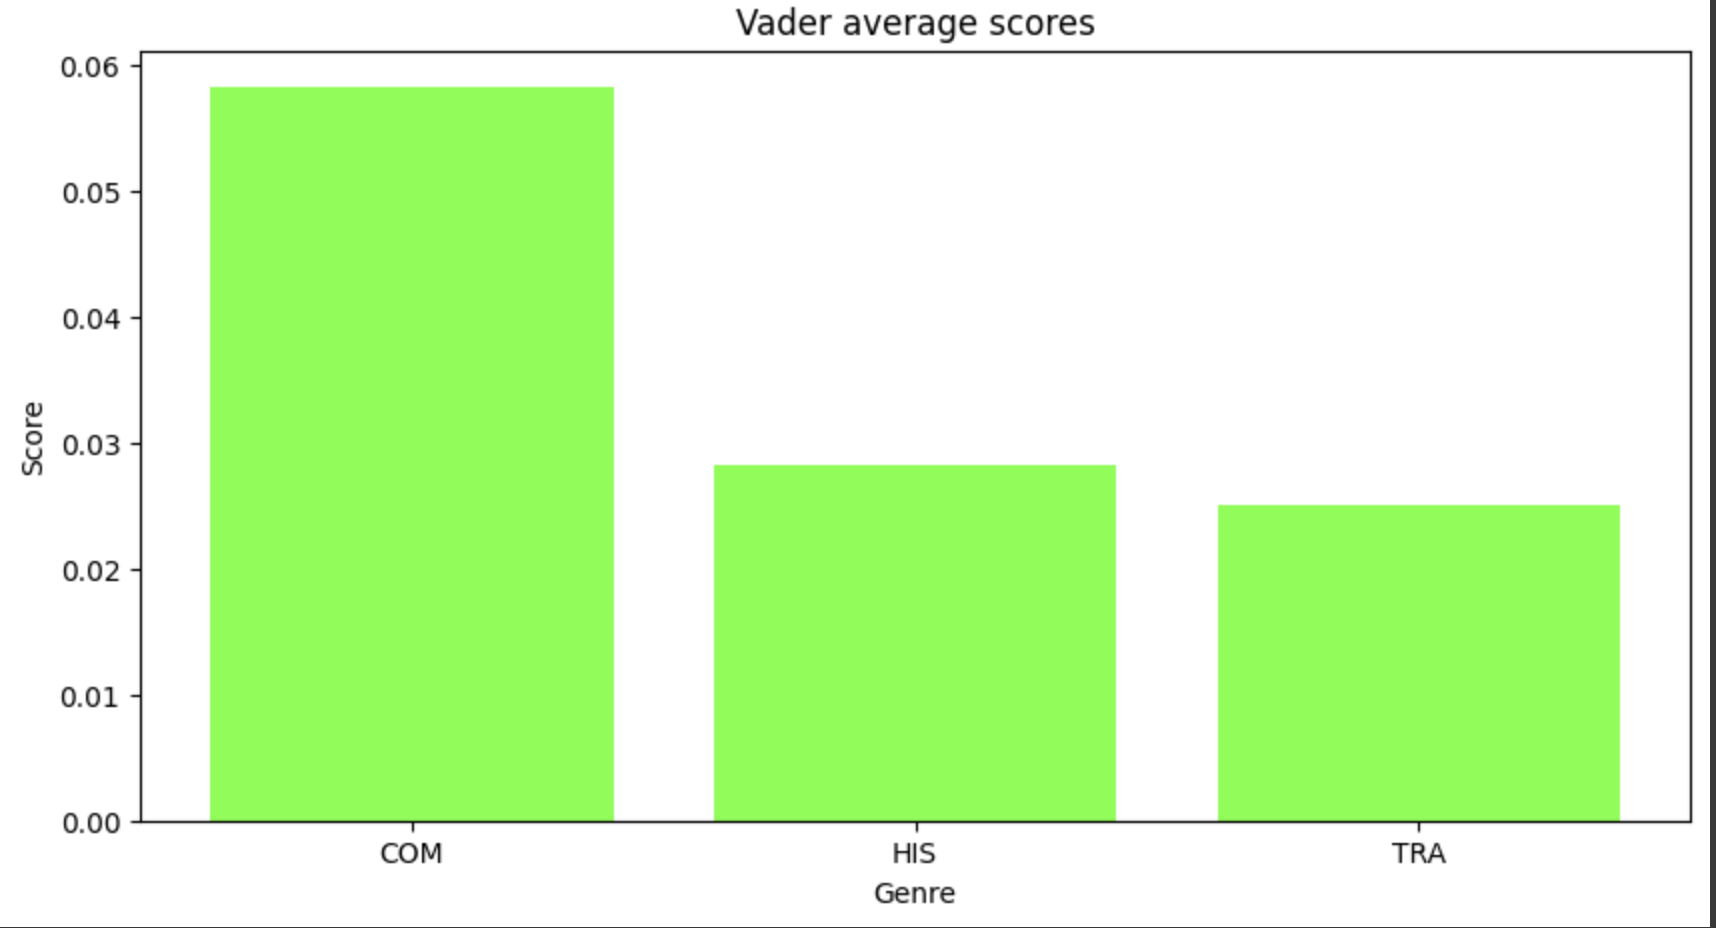

Humour scores were practically neck-and-neck - which provides an interesting insight into humour and its evolution: comedies have just the slightest fraction more comedic vocabulary than the other two genres. It seems that comedic vocabulary has evolved at a much faster rate than its emotional counterpart - what was considered 'funny' vocabulary 400 years ago has shifted so much that Shakespeare's comedies are almost identical to his histories and tragedies when looking simply at what is considered 'humorous' in the modern day lexicon. Another explanation could be that Shakespeare's humour relied more on comedic phrases and topical jokes that one cannot measure simply by counting 'funny' words.

The VADER sentiment analysis was the most informative analysis done on the three genres. It showed a clear positive difference between the comedies and non-comedies. We can see that both histories and tragedies are quite similar, and the comedies are significantly more positive relative to the other genres. However, looking at the VADER score itself, we can observe that the score for comedy is just over 0.05 -- that's just above neutral for compound scores. All of the genres, in fact, are above zero, so again, VADER's ability to parse and interpret Shakespeare's language might be limited when compared to a modern text. Also, this is an average score, and in a play, there are many different viewpoints from different characters which one would assume might balance each other out, so the difference we observe here is still certainly meaningful. The fact that with so many texts, comedies are still much more sentimentally positive than histories and tragedies, suggest that the comedies are, as the name suggests, more cheerful sentimentally, which gives weight to the emotional vocabulary observations and therefore partially legitimises my assumptions. With all of these metrics combined, there is a tangible difference between Shakespearean comedies and non-comedies, and one could potentially combine tragedies and histories into one genre, due to their similarity across all of these measures.

**Comparing characters**

Play: Henry VIII

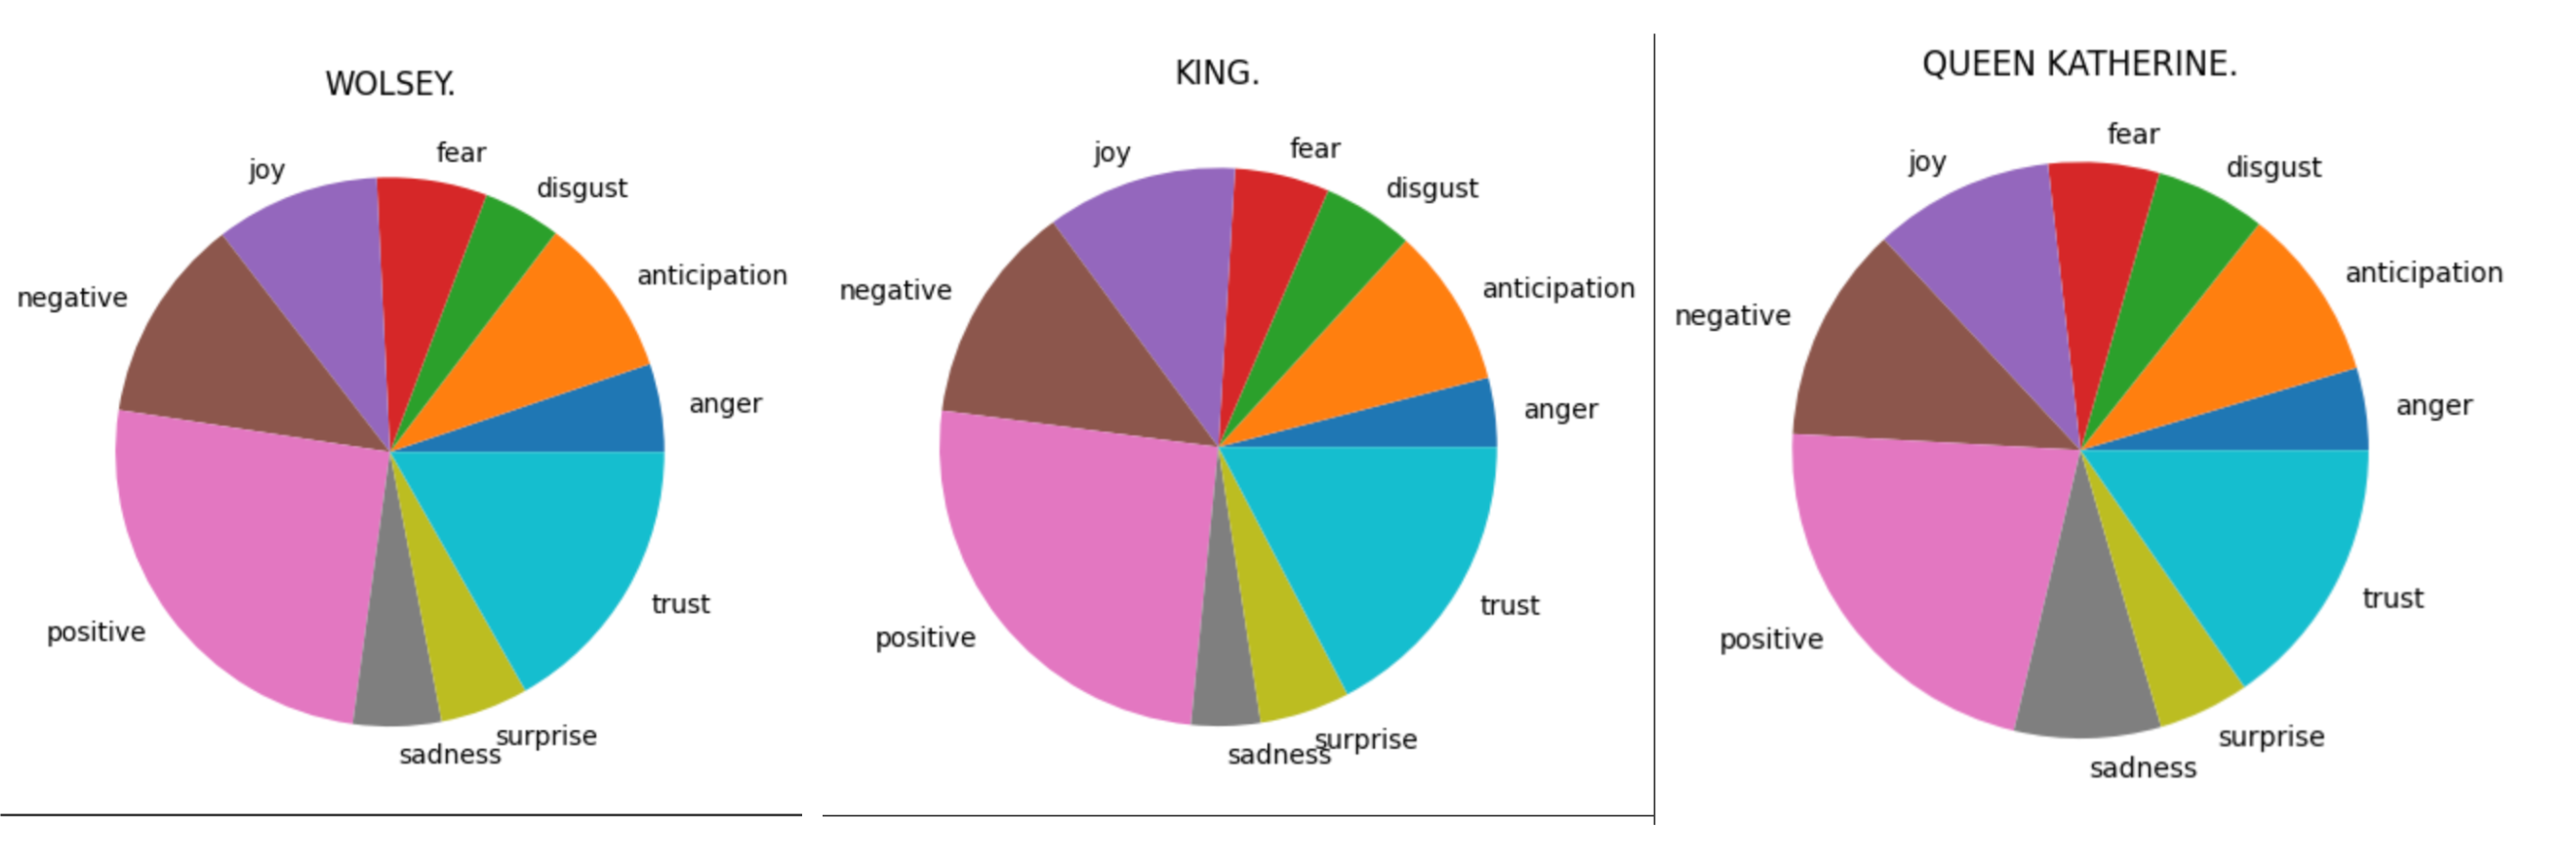

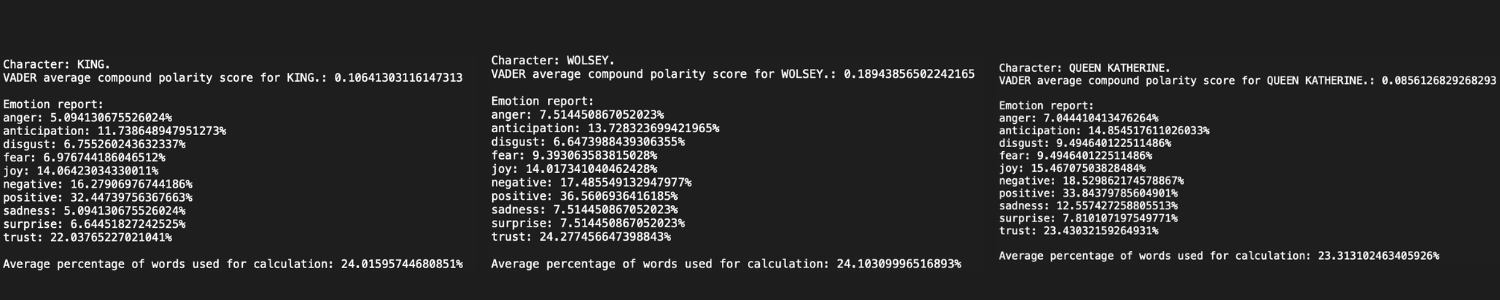

Play: The Tempest

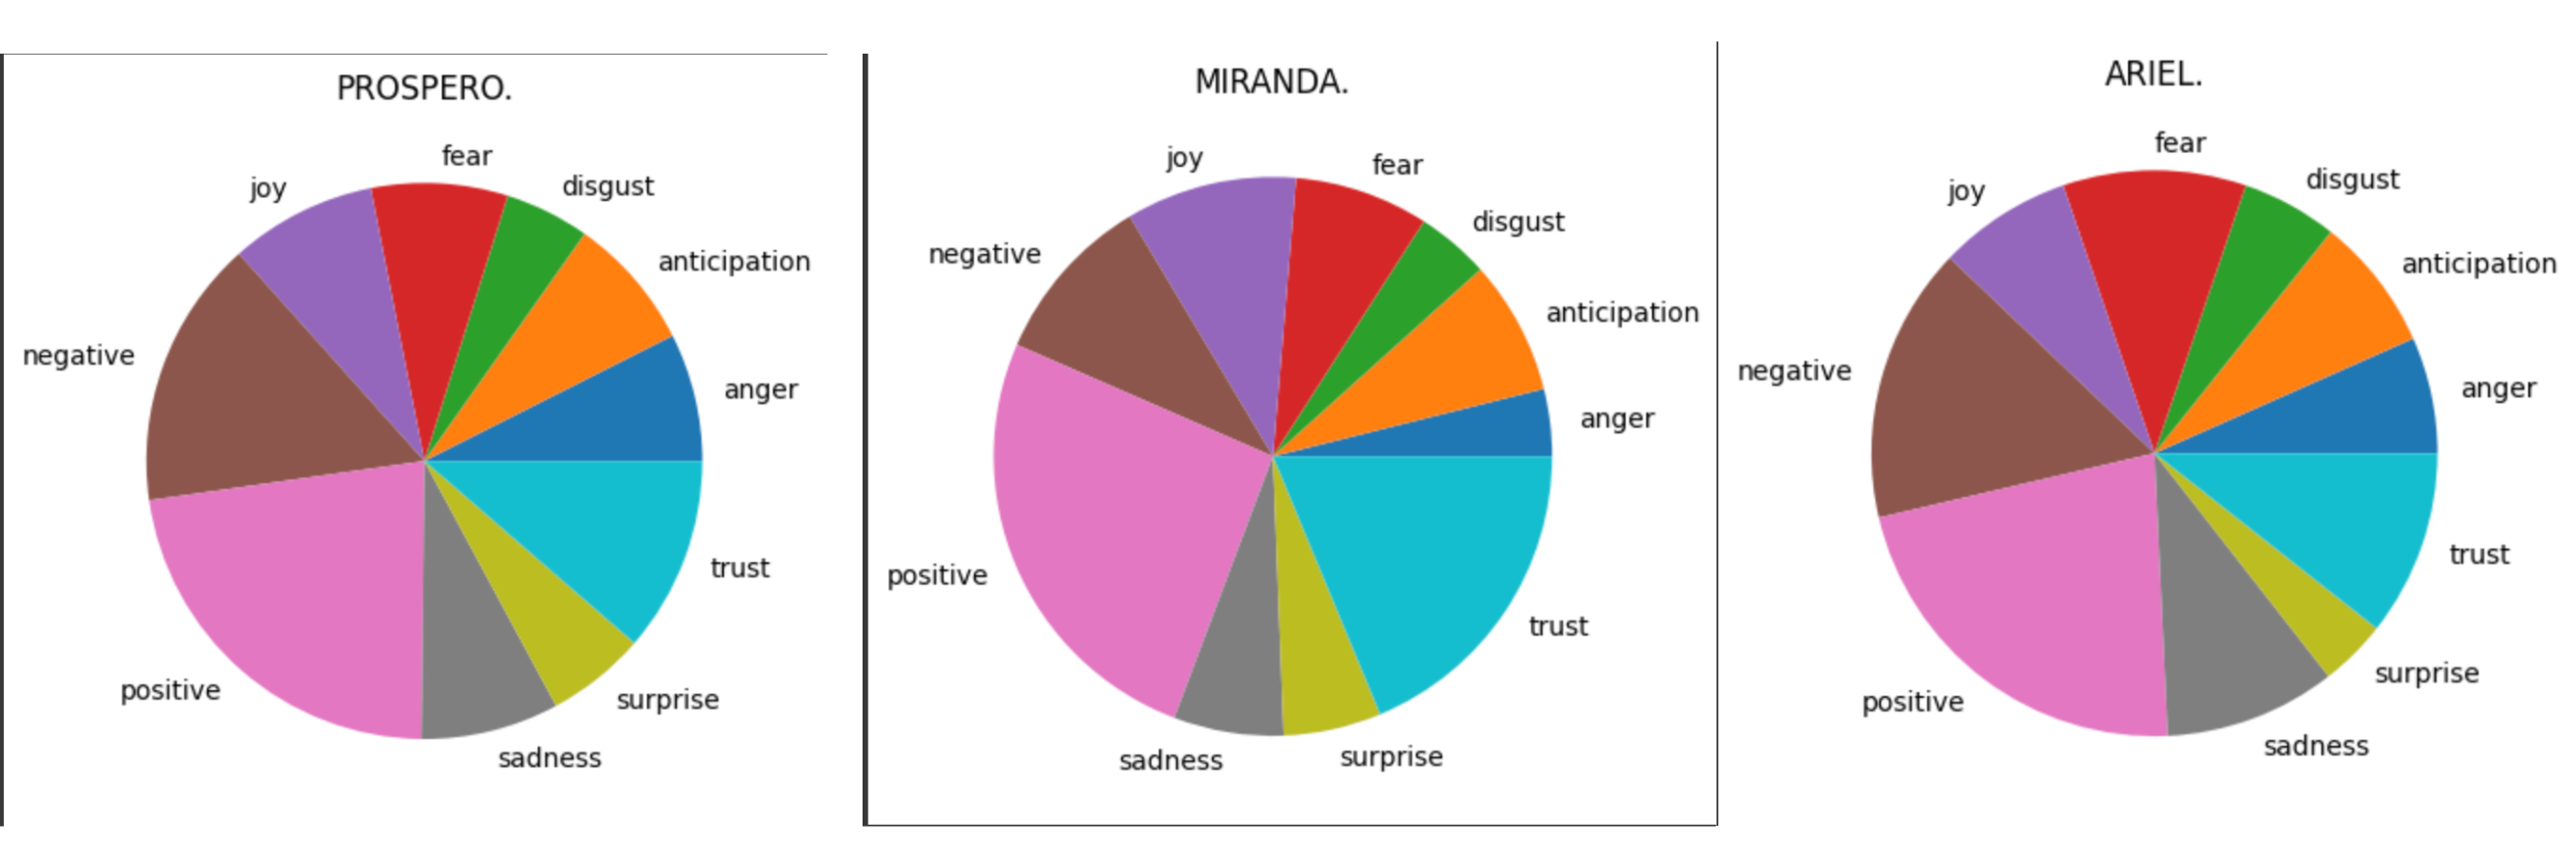

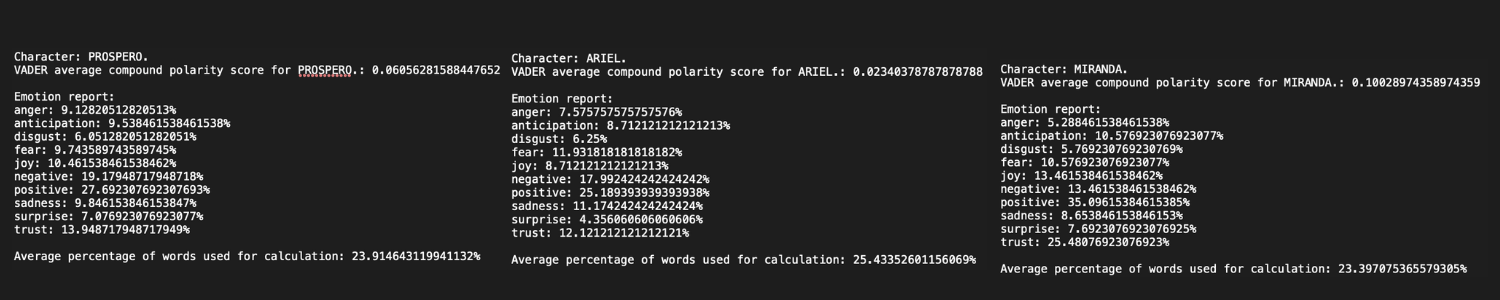

Play: Romeo and Juliet

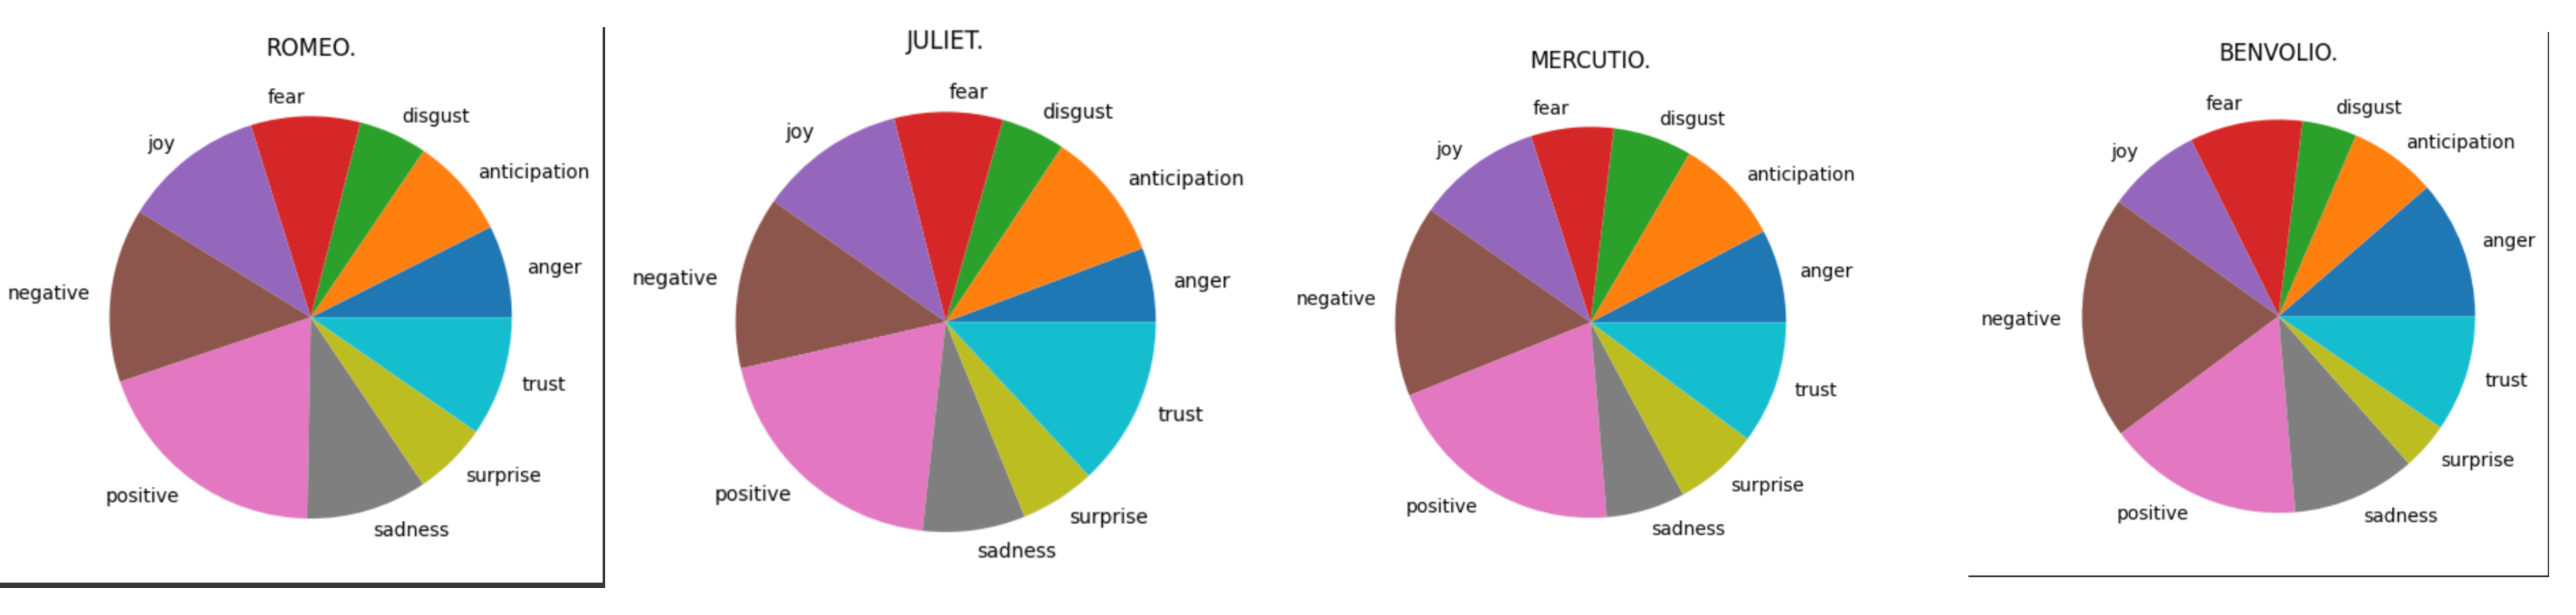

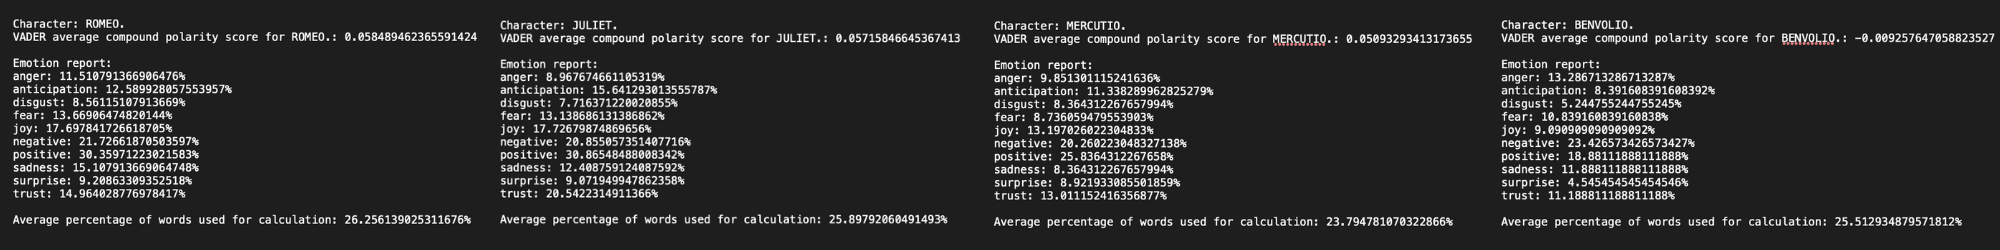

By analysing specific characters, we can quite easily observe vocabulary differences, compared to the minimal differences in the genre comparison. For example, we can observe that the character of Wosely in Henry VIII uses significantly more positive vocabulary than King Henry or Queen Katherine (~36% compared to 33% and 32%). Queen Katherine exhibits much more sadness (around double) than either of her counterparts. [Sparknotes](https://www.sparknotes.com/shakespeare/henryviii/characters/) observes that Katherine is betrayed by her husband and Worsley when Henry VIII seeks a divorce with her, 'She speaks at length of her loyal nature as a wife for more than 20 years, and she cannot believe she is being punished for it.' Perhaps this is a cause for her abundance of sadness in her emotional profile.

In The Tempest, we can observe that Miranda is a very positive character. Her average VADER sentiment is high, 0.1, well above the 'neutral' line of 0.5, and 35% of her spoken words are positive. Her trust and joy are both also significantly higher than the other two characters. [As Sparknotes](https://www.sparknotes.com/shakespeare/tempest/character/miranda/) says of Miranda, 'Just under fifteen years old, Miranda is a gentle and compassionate, but also relatively passive, heroine. From her very first lines she displays a meek and emotional nature.' It seems that her compassionate side as a character is most apparent when analysing her lines and vocabulary.

In Romeo and Juliet, we have our first character with a negative VADER average sentiment (albeit very small): Benvolio. At ~-0.0093, Benvolio's character lies very close to a perfectly neutral VADER score, and [Sparknotes'](https://www.sparknotes.com/shakespeare/romeojuliet/character/benvolio/) character analysis gives us a possible reason: 'Throughout Romeo and Juliet, Benvolio stands in as the Montagues’ young voice of reason.' Benvolio seems to be a character that is a middle ground, in other words, neutral, which aligns with his sentiment score, the most neutral of any characters analysed in this section. In his emotional vocabulary, Benvolio is also the only character to have more negative vocabulary than positive. But, Benvolio is not a villian - thus, we cannot immediately assume negative vocabulary to be associated with an evil character in one of Shakespeare's texts; there is much more nuance. The characters of Romeo and Juliet are both similar - as though they are meant for each other! However, Romeo has more anger (11% compared to ~8%) in his vocabulary, which aligns with his actions in the play - he murders Juliet's cousin, Tybalt (spoilers!). Juliet, on the other hand, is more trusting than Romeo (20% compared to 14%), and again we can glean some context for this from [Sparknotes](https://www.sparknotes.com/shakespeare/romeojuliet/character/juliet/): 'She makes a logical and heartfelt decision that her loyalty and love for Romeo must be her guiding priorities.' Finally, Romeo exhibits more sadness than Juliet (about 3%), and one assumption we could make is that this is from Romeo's loss of Mercutio and his guilt over Tybalt, and finally his disovery of Juliet, whom he wrongly believes is dead (I'm sorry, but you had 400 years to read it). Interestingly, despite Mercutio's flamboyance and presence in the play, his analysis reveals little of his colourful character.

Overall, we can observe how individual character analysis using the same methods can glean some real insight into how vocabulary and sentiment makes a direct impact on how a character is perceived - most of the emotional profiles of these characters line up with their motives and roles in their respective plays. With a more intelligent analysis system looking deeper, I'm sure that these observations will only become more clear. I think that these findings demand for further research using newer, more valence-aware machine models to parse some of the less concrete emotional vocabulary to futher explore the profiles of characters in Shakespeare.


Across Question One, we can see how the use of computational analysis on Shakespeare's texts has revealed crucial differences between his genres, plays, and characters. And thus, we perhaps inch a little closer to understanding the mystery of his work, and quantifying it using cold, hard numbers.  We discovered that his genres have tangible differences between them, even when using modern-day metrics and sentiment analysis systems, and that emotional profiles of his characters line up with academic definitions of their personalities.




5.2 Question Two

Question two selects Shakespeare's plays at random to compare them to the other authors' works, in the interest of maintaining a relatively equal size. The below results were attained from this set of plays:

set 1: first set of Shakespeare's plays. 6 plays; 2 from each genre.

1. MEASURE FOR MEASURE
2. A MIDSUMMER NIGHT'S DREAM
3. THE THIRD PART OF KING HENRY THE SIXTH
4. KING RICHARD THE THIRD
5. TROILUS AND CRESSIDA
6. THE TRAGEDY OF JULIUS CAESAR

set 2: second set of Shakespeare's plays, used only to comapare with the first set. 6 plays; 2 from each genre.

1. THE TWO NOBLE KINSMEN
2. THE COMEDY OF ERRORS
3. KING RICHARD THE SECOND
4. THE LIFE OF KING HENRY THE FIFTH
5. THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
6. THE TRAGEDY OF KING LEAR

set 3: third set of Shakespeare's plays, used to compare against Francis Bacon's essays. 3 plays; 1 from each genre.

1. THE TEMPEST
2. THE LIFE OF HENRY THE SIXTH
3. THE LIFE OF TIMON OF ATHENS




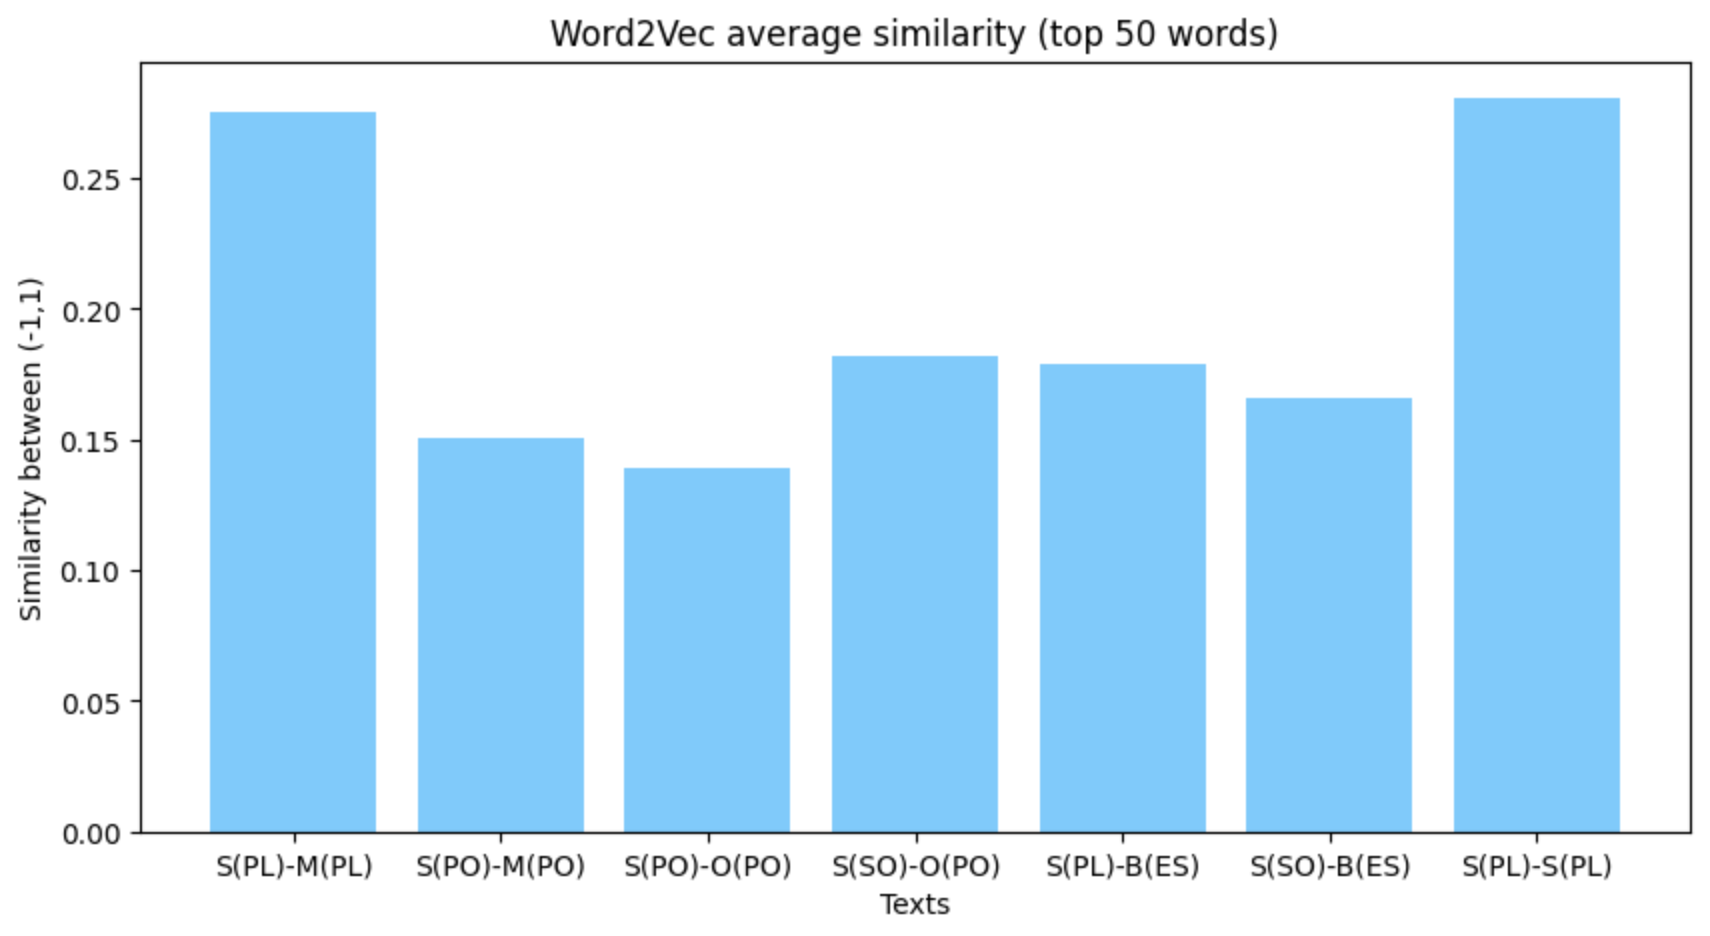

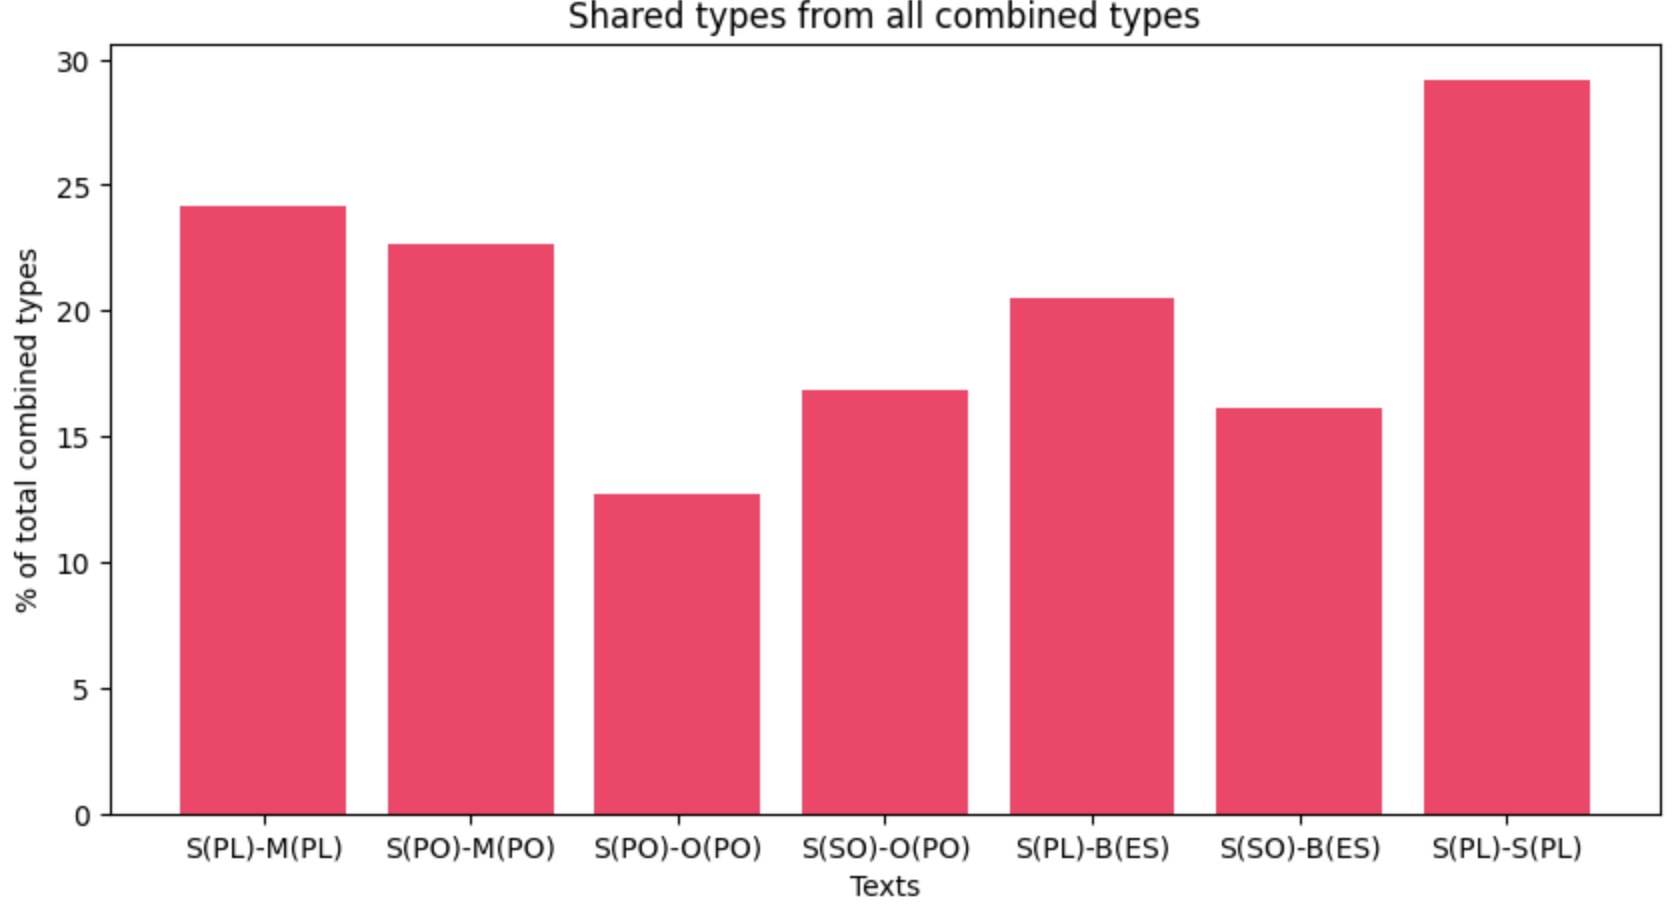

The above graphs are two different measures of similarity across all of the text comparisons made in the second part of this assignment. The first uses Word2Vec word vectoring to calculate the word 'distance' between the top 50 words of each text. The second is the proportion of shared types, that is, unique words, between the two texts out of all the types, all the unique words, of both texts. Important in both of these graphs is S(PL)-S(PL) - the comparison between Shakespeare plays and Shakespeare plays. This should be considered the benchmark for similarity - as this is how similar two sets of Shakespeare texts can be - a cosine distance of around 0.3 and a combined shared type proportion of around 30%.

In the first graph, we can see that S(PL)-M(PL), Shakespeare's plays vs Marlowe's plays, ranks the second highest, and very closely to Shakespeare vs Shakespeare. This comparison is also the second highest in the shared types benchmark, at just under 25%. In other words - Marlowe's top 50 words from his plays are the most closely related to shakespeare's top 50 words, and Shakespeare and Marlowe share the largest proportion of vocabulary out of their combined total vocabularies. Moreover, Marlowe's poems compared to Shakespeare's poems ranks third in the second graph - indicating that Shakespeare and Marlow also share vocabulary across their poems, not just their plays. Let's look deeper into the relationship between Shakespeare's and Marlowe's texts.

Shakespeare's plays vs Marlowe's plays

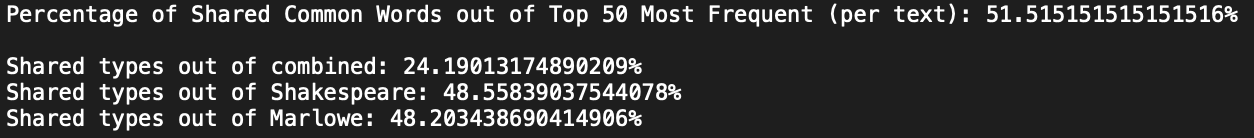

One observation we can make from the above data is that of the 50 most frequent words from each text, 50% are shared between the two texts.

Furthermore, when we look at the shared types's proportion of the types of one author, we can see that Shakespeare is almost equal to Marlowe (within 1%). Essentially, when only considering types, Shakespeare has as much Marlowe as Marlowe has Shakespeare.

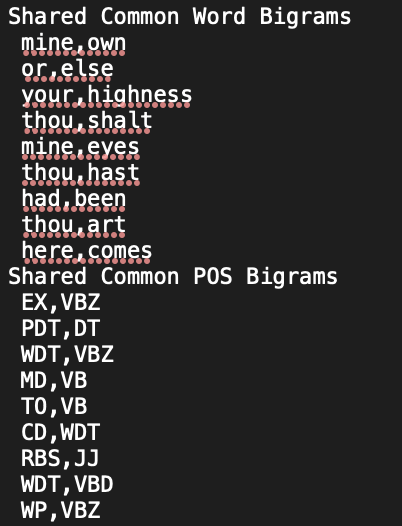

Bigram matches are not unusual across the texts, especially considering the similarity in time of writing and style, and so though these matches suggest that both are certainly similar, it makes no indication that they are the same. There simply isn't enough information to make such an assumption.

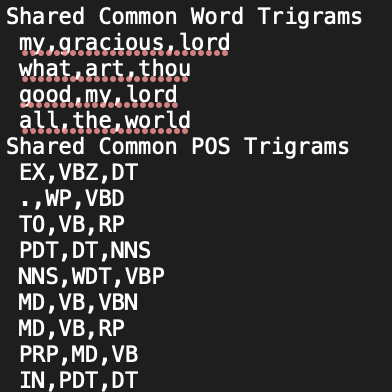

Analysis of the trigrams is more revealing, we begin to see some common three word patterns (which are nonexistent when comparing Shakespeare to other authors besides himself). If we look at the same list for Shakespeare vs Shakespeare, only one of these word trigrams (good, my, lord) is present. This suggests that the trigrams found in common between Marlowe and Shakespeare are not highly common in Shakespeare's work, but still present. Examining the first nine shared POS trigrams for Shakespeare vs Shakespeare:

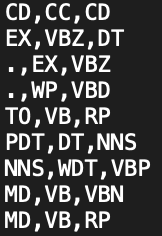

Seven out of nine POS markers (over 75%) are the same. This is a much more encouraging statistic - the lilelihood of authors writing the exact same words is low, but writing phrases with similar construction could be much more likely. Let's examine the top phrases, EX,VBZ,DT and .,WP,VBD.


EX, VBZ, DT

Existential 'there', Verb 3rd person singular present tense, Determiner
Builds phrases such as:
1. "There remains a difficult task."
2. "There happens a sudden change."


., WP, VBD

Period, Wh-pronoun, Verb past tense

Builds phrases such as:
1. "Who discovered the ancient manuscript?"
2. "What happened at the mysterious mansion?"

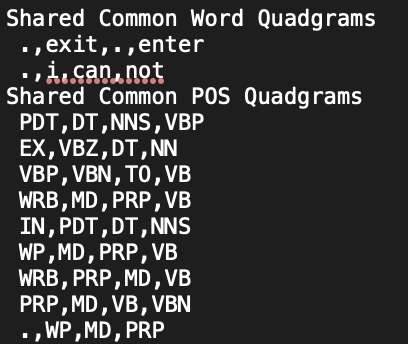

Here, the quadgrams for words are few and quite general, but the fact that there is a match alone is impressive. The first is clearly a set of stage directions, which can't really be used to judge the similarity between two oauthors, and the second is a common phrase which could quite simply be attributed to a coincidence; characters talk about themselves often in plays and this match is no huge surprise. However, the two texts do share a large number of POS tags, and the second-most common entry is the same as the Shakespeare vs Shakespeare comparison:

EX, VBZ, DT, NN

Builds phrases such as:
1. "There appears a creature."
2. "There emerges the witch."

This common quadgram is very similar to one of the most common shared trigrams, and suggests a prevalence of EX being a similarity betwwen Marlowe and Shakespeare's works. They both use the existential there in phrases, however Shakespeare more often uses EX to begin sentences, whereas it appears that Marlowe often has EX within his phrases.

Shakespeare's poems vs Marlowe's poems

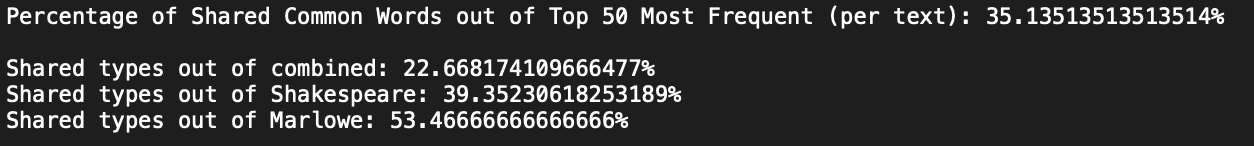

Here, we can see that the most frequent words are shared at a lower rate between the two authors, around 15% less than when comparing the plays of Shakespeare and Marlowe. Additionally, a lower proportion of shared types exist in all of Shakespeare types, suggesting that his poetic vocabulary is larger than Marlowe's.

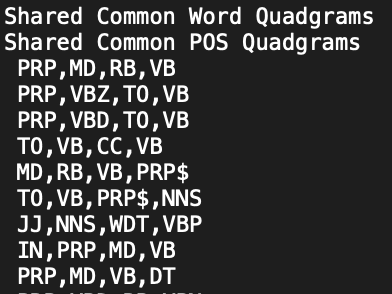

Unlike the comparison between Marlowe and Shakespeare's plays, there are no common word quadgrams between the poems of these authors. One very interesting observation is that none of the most common shared quadgrams are translated over to the plays - the phrases are completely different from the plays. This leaves me with an extra discovery about the crucial differences between the phrase composition of poetry and plays.

The top two quadgrams:

PRP, MD, RB, VB

Builds phrases like:
1. "She can quickly solve the puzzle."
2. "I may quietly explore the forest."


PRP, VBZ, TO, VB

Builds phrases like:
1. "He goes to swim every morning."
2. "She tends to speak softly."

This in-depth comparison leaves me with a series of conclusions - Shakespeare and Marlowe are similar writers. They share a large proportion of words, their top 50 words are computationally similar, and they use similar phrases, both in their plays and poems.

Though they are very different mediums, the comaprison of Shakespeare's plays and Bacon's essays revealed a large proportion of shared types. I decided to look into the similarities further.

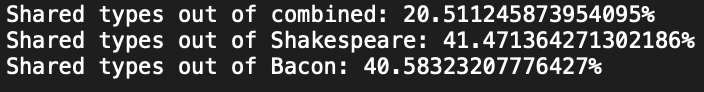

We can observe that Shakespeare and Bacon, like Shakespeare and Marlowe, have a similar proportion of shared types out of their respective total number of types. There is as much of Shakespeare in Bacon as Bacon in Shakespeare - but less overall than Marlowe and Shakespeare, around 8%. The comparion also reveals no common word trigrams or quadgrams, but does show some interesting POS tag quadgrams:

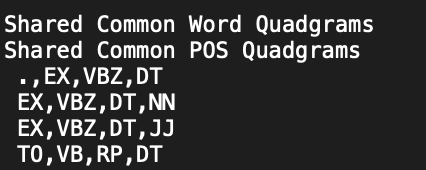

Here, we can observe that the EX, VBZ, DT... POS pattern is prominent. This suggests that the pattern is not simply common between Shakespeare and Marlowe, it is also a common phrase of its time, though not in poetry.

Finally, I looked into the details of what made de Vere's poems so unlike Shakespeare's. The comparison ranked the lowest for Word2Vec and shared types.

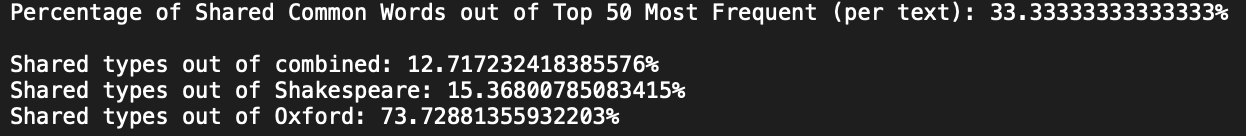

The two texts, surprisingly, shared a large proportion of their most common words, but only 12% of their total types were shared, and while 73% of Oxford's total types were shared, only 15% of Shakespeare's total types were shared. Oxford was very similar to Shakespeare but Shakespeare was not very similar to Oxford. Could this suggest that Oxford was merely a copycat of Shakespeare's poetry? Only two quadgrams were shared between the two texts:

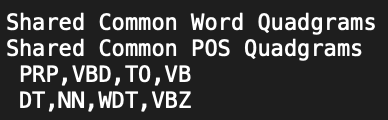

We can instantly see that the most common POS quadgram is also one of the most common shared POS phrases between Marlowe and Shakespeare. This further highlights the existence of phrase patterns for different mediums of writing in the Elizabethan era. Needless to say, the lack of similarities between the two authors makes Oxford the least likely candidate for Shakespeare's true identity, even though, ironically, he far outshines Marlowe as a favourite among internet circles.

To conclude question two, the analysis performed on the six comparisons between Shakespeare and his supposed true identities revealed Christopher Marlowe to be the most similar. Marlowe had a considerably higher Word2Vec score, combined type percentage, and bigram, trigram and quadgram matches than all other texts save for the comparison done between Shakespeare and Shakespeare. However - the crux of the discovery is right there - if Marlowe wrote like shakespeare, then the analysis of his plays against Shakespeare's should yield a very similar result to Shakespeare vs Shakespeare. But, the comparisons were noticeably different enough that, from the analysis I performed, Marlowe was too different from Shakespeare to be The Bard. The likely explanation is that the observed similarities, not just between Marlowe and Shakespeare, but all of the texts, are the products of the shared time in which all of the texts were written.

It is my belief that Shakespeare's higher similarity to Marlowe comes from Marlowe, the elder playwright, having direct influence on Shakespeare's work, so perhaps there is an element of truth that Shakespeare is Marlowe -- art often imitates art, and Shakespeare is not invulnerable to this paradigm. No, it appears as though I am another unsuccessful party in the hunt for conclusive evidence of Shakspeare's non-Stratford-upon-Avon-ness. Some key discoveries were made in the process, however; it was observed the phrase-level grammars that make up plays, prose, and poems, and the POS differences that separate them.

I think that the 'mystery' of Shakespeare is much more about how revolutionary his structure, layers upon layers of meaning, and deeply human characters can be woven together so well as to outlive the weaver. One day we might come across sufficiently advanced methods to find out just how this enigmatic body of work strikes the chords that it does, truly unmasking the Bard. But for now, while academics focus on bickering over names and faces, I think it's important to remember that in the case of Shakespeare's identity -- some mysteries are solved; and some are never mysteries to begin with.


6. Reflections

Over the course of my research, I had a number of ideas that I had to abandon because of the amount of time I had to work with. Additionally, I encountered a few speed-bumps that I think could certainly be smoothed out in the future when further exploring this topic. I think that, despite the further research that could be done and the limitations of the project, this research served as an excellent pilot for further analysis.

1. Overall project structure. I approached this research with two distinct questions in mind, and as such I developed two completely separate programs to best answer each. This resulted in completely different methods of storing and analysing data which left me with readable but not completely clean code. I think that either creating a second categorised corpus, or one very large dictionary, would be a way to eliminate a lot of clutter across the program. This would make my job as a programmer much easier and help me access all of my files and metrics from one place - I'd essentially be able to run everything from one command centre instead of sequentially. This would help greatly with the scaleability of this research.

2. Another assistance for scaleability would be an automatic text trimmer. I spent far too much time pruning texts to remove bookends when a simple script could have detected where to chop the texts and process them automaticcally. Again, this would allow me much more time to add more texts as I go and make changes to text sizes as required. It would also drastically reduce the lines of code required in this program. Another avenue to explore would be automating the comparisons made in the second question. With a dictionary system, a mere fraction of the lines of code would be required to run all of the comparisons instead of dozens.

3. Comparison against modern texts. Comparing Shakespeare against modern plays and poems would provide additional benchmarks for the comparisons made in both question one and question two. It would show differences, if any existed, in modern and archaic emotional vocabulary usage and sentiment averages. It would also show differences in phrase structures, and provide further insights into not just the attributes of Shakespeare and his counterparts but also the metrics used to measure these attributes. A modern text would help to show if the tools I used in this assignment were the most appropriate to use on centuries-old text.

4. Looking further into characters. The second part of my first question was fascinating, and provoked a number of further questions about characters in Shakespeare's plays. Could you build a rule-based system to identify heroes ana villians? Could you identify individual speech patterns in characters? Could you build a personality profile of the character using advanced sentiment analysis? One could also compare the attributes of these characters to those of other authors, such as Dickens, supposedly the master of character-building, to see what makes a great character memorable.

5. Further Word2Vec and AI usage. I think that the results gleaned from my Word2Vec were an interesting proof of concept: comparing the top 50 words in each text was, however, limiting for the results it would glean. It would be interesting to look deeply into more advanced models built to analyse phrases and sentences and compare them with others, not just for similarity, but also to identify themes, characters, settings, ect. I saw BERT as a potential avenue to look into for this type of deep-learning based research. I think that neural networks would be highly effective at discovering trends in the texts that finding the cosine distance between two encoded words cannot. I also want to look into plagiarism detector models, which might be adept at comparing two authors to see if they write text in a similar way, but I'm currently unsure about how effective they are at comparing writing that isn't just copied and pasted.

6. Collecting more POS information. I saw that trends existed between some authors for POS tagged quadgrams, but I was unable to see the most common quadgrams for further analysis. Seeing the discrete words as related to the phrase structures would allow me to gauge similarity using a tool like Word2Vec to compare the most common POS-tagged quadgrams from one author to another, even if they weren't necessarily the same.

